<a href="https://colab.research.google.com/github/ZaUt-bio/SincNet-used-for-Parkinsons-Disease-detection/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


Mounted at /content/drive


# Off vs. Hc

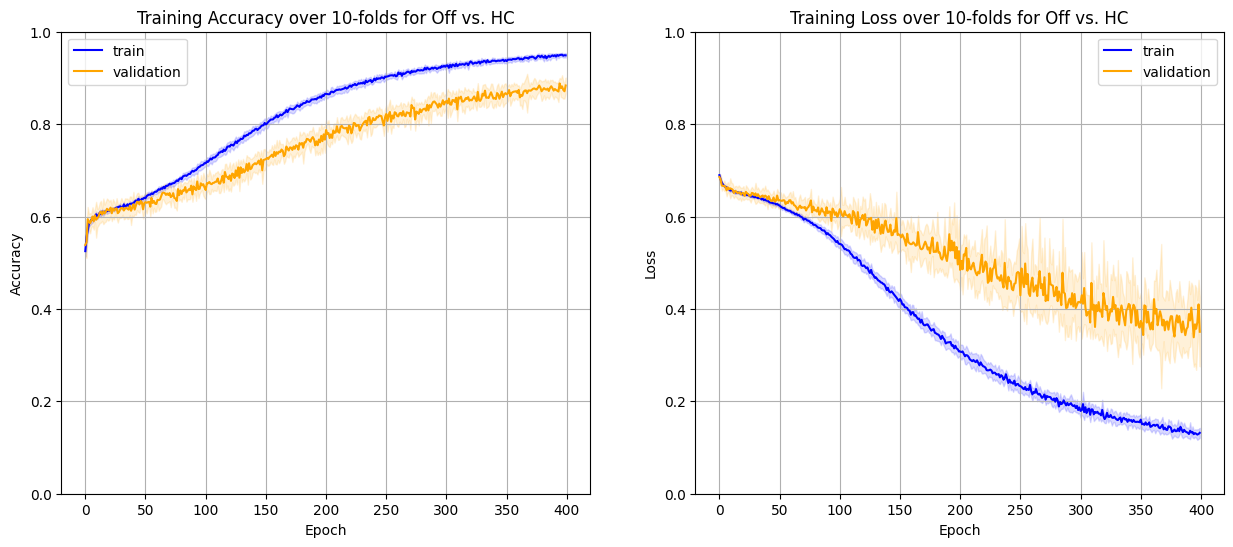

In [ ]:

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_history/'+'/res_evaluation_file_fold'+str(f)+".res"
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_tr%s'%f]=[]
  globals()['loss_val%s'%f]=[]
  globals()['acc_tr%s'%f]=[]
  globals()['acc_val%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
    if elements[i]=='loss_tr':
      globals()['loss_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_tr":
      globals()['acc_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="loss_val":
      globals()['loss_val%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_val":
      globals()['acc_val%s'%f].append(float(elements[i+1]))
    if i==382 and f==0:
      globals()['loss_tr%s'%f]=[]
      globals()['loss_val%s'%f]=[]
      globals()['acc_tr%s'%f]=[]
      globals()['acc_val%s'%f]=[]
  if f==0:
    loss_tr = globals()['loss_tr%s'%f][0:400]
    acc_tr = globals()['acc_tr%s'%f][0:400]
    loss_val = globals()['loss_val%s'%f][0:400]
    acc_val = globals()['acc_val%s'%f][0:400]

  else:
    loss_tr = np.vstack((loss_tr,globals()['loss_tr%s'%f][0:400]))
    acc_tr = np.vstack((acc_tr,globals()['acc_tr%s'%f][0:400]))
    loss_val = np.vstack((loss_val,globals()['loss_val%s'%f][0:400]))
    acc_val = np.vstack((acc_val,globals()['acc_val%s'%f][0:400]))
loss_tr_mean = np.mean(loss_tr,axis=0)
loss_tr_std = np.std(loss_tr, axis=0)
acc_tr_mean = np.mean(acc_tr,axis=0)
acc_tr_std = np.std(acc_tr, axis=0)
loss_val_mean = np.mean(loss_val,axis=0)
loss_val_std = np.std(loss_val, axis=0)
acc_val_mean = np.mean(acc_val,axis=0)
acc_val_std = np.std(acc_val, axis=0)

# --------------------

plt.figure(figsize=([15,6]))
#plt.figsize
plt.subplot(1,2,1)
plt.plot(acc_tr_mean,color='blue',label='train')
plt.fill_between(range(400),acc_tr_mean + acc_tr_std,
                 acc_tr_mean - acc_tr_std, alpha=0.15, color='blue')
plt.plot(acc_val_mean,label='validation',color = 'orange')
plt.fill_between(range(400),acc_val_mean + acc_val_std,
                 acc_val_mean - acc_val_std, alpha=0.15, color='orange')

plt.legend()
plt.ylim([0,1])
#plt.xlim([25,29])
plt.title('Training Accuracy over 10-folds for Off vs. HC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(loss_tr_mean,label='train', color='blue')
plt.fill_between(range(400),loss_tr_mean + loss_tr_std,
                 loss_tr_mean - loss_tr_std, alpha=0.15, color='blue')
plt.plot(loss_val_mean,label='validation',color='orange')
plt.fill_between(range(400),loss_val_mean + loss_val_std,
                 loss_val_mean - loss_val_std, alpha=0.15, color='orange')
plt.legend()
plt.ylim([0,1])
plt.title('Training Loss over 10-folds for Off vs. HC')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()


In [ ]:
loss_tr.shape

(10, 400)

fold: 0, acc: 0.891620, Sensitivity: 0.860092, Specificity: 0.921569, Precision: 0.912409, F_score: 0.885478
fold: 1, acc: 0.879330, Sensitivity: 0.881549, Specificity: 0.877193, Precision: 0.873589, F_score: 0.877551
fold: 2, acc: 0.887151, Sensitivity: 0.872727, Specificity: 0.901099, Precision: 0.895105, F_score: 0.883774
fold: 3, acc: 0.898210, Sensitivity: 0.851380, Specificity: 0.950355, Precision: 0.950237, F_score: 0.898096
fold: 4, acc: 0.860179, Sensitivity: 0.746377, Specificity: 0.958333, Precision: 0.939210, F_score: 0.831763
fold: 5, acc: 0.887025, Sensitivity: 0.922018, Specificity: 0.853712, Precision: 0.857143, F_score: 0.888398
fold: 6, acc: 0.897092, Sensitivity: 0.887588, Specificity: 0.905782, Precision: 0.895981, F_score: 0.891765
fold: 7, acc: 0.891499, Sensitivity: 0.828889, Specificity: 0.954955, Precision: 0.949109, F_score: 0.884935
fold: 8, acc: 0.908277, Sensitivity: 0.869099, Specificity: 0.950935, Precision: 0.950704, F_score: 0.908072
fold: 9, acc: 0.870

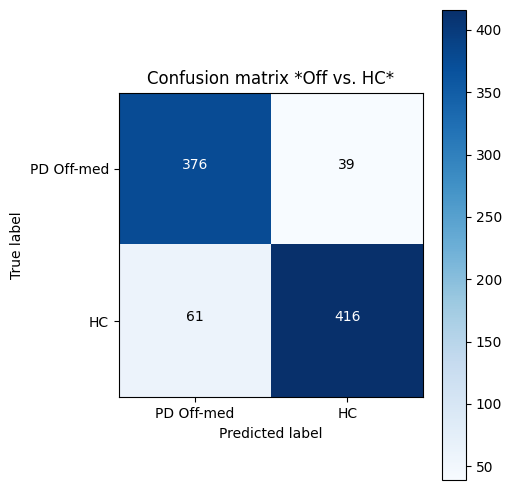

In [ ]:
for f in range(10):
  file_path = '/content/drive/MyDrive/COLAB/project/Network_history/'+'res_test_file_fold'+str(f)+'.res'
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_test%s'%f]=[]
  globals()['acc_test%s'%f]=[]
  globals()['Sensitivity%s'%f]=[]
  globals()['Specificity%s'%f]=[]
  globals()['Precision%s'%f]=[]
  globals()['F_score%s'%f]=[]
  globals()['TP%s'%f]=[]
  globals()['TN%s'%f]=[]
  globals()['FP%s'%f]=[]
  globals()['FN%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
      if elements[i]=="loss_test":
        globals()['loss_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="acc_test":
        globals()['acc_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Sensitivity":
        globals()['Sensitivity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Specificity":
        globals()['Specificity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Precision":
        globals()['Precision%s'%f].append(float(elements[i+1]))
      elif elements[i]=="F_score":
        globals()['F_score%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TP":
        globals()['TP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TN":
        globals()['TN%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FP":
        globals()['FP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FN":
        globals()['FN%s'%f].append(float(elements[i+1]))

  if f==0:
    loss_test = globals()['loss_test%s'%f][-1]
    acc_test = globals()['acc_test%s'%f][-1]
    Sensitivity = globals()['Sensitivity%s'%f][-1]
    Specificity = globals()['Specificity%s'%f][-1]
    Precision = globals()['Precision%s'%f][-1]
    F_score = globals()['F_score%s'%f][-1]
    TP = globals()['TP%s'%f][-1]
    TN = globals()['TN%s'%f][-1]
    FP = globals()['FP%s'%f][-1]
    FN = globals()['FN%s'%f][-1]
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test), np.array(Sensitivity),np.array(Specificity), np.array(Precision),np.array(F_score)))

  else:
    loss_test = np.vstack((loss_test,globals()['loss_test%s'%f][-1]))
    acc_test = np.vstack((acc_test,globals()['acc_test%s'%f][-1]))
    Sensitivity = np.vstack((Sensitivity,globals()['Sensitivity%s'%f][-1]))
    Specificity = np.vstack((Specificity,globals()['Specificity%s'%f][-1]))
    Precision = np.vstack((Precision,globals()['Precision%s'%f][-1]))
    F_score = np.vstack((F_score,globals()['F_score%s'%f][-1]))
    TP = np.vstack((TP,globals()['TP%s'%f][-1]))
    TN = np.vstack((TN,globals()['TN%s'%f][-1]))
    FP = np.vstack((FP,globals()['FP%s'%f][-1]))
    FN = np.vstack((FN,globals()['FN%s'%f][-1]))
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test[f]), np.array(Sensitivity[f]),np.array(Specificity[f]), np.array(Precision[f]),np.array(F_score[f])))



loss_test_mean = np.mean(loss_test,axis=0)
acc_test_mean = np.mean(acc_test,axis=0)
Sensitivity_mean = np.mean(Sensitivity,axis=0)
Specificity_mean = np.mean(Specificity,axis=0)
Precision_mean = np.mean(Precision,axis=0)
F_score_mean = np.mean(F_score,axis=0)
TP_mean = np.mean(TP,axis=0)
TN_mean = np.mean(TN,axis=0)
FP_mean = np.mean(FP,axis=0)
FN_mean = np.mean(FN,axis=0)
Kappa = 2 * (TP_mean * TN_mean - FN_mean * FP_mean) / (TP_mean * FN_mean + TP_mean * FP_mean + 2 * TP_mean * TN_mean + FN_mean*FN_mean + FN_mean * TN_mean + FP_mean*FP_mean + FP_mean * TN_mean)
print("Kappa_mean: %f" % ((Kappa)))
# confusion matrix
confusion_mtx = np.array([[int(TP_mean), int(FP_mean)], [int(FN_mean), int(TN_mean)]])
print("confusion matrix=\n",confusion_mtx)
class_names=['PD Off-med','HC']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix *Off vs. HC*',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_mtx, class_names)


print("loss_test_mean: %f, acc_test_mean: %f" %  (np.array(loss_test_mean), np.array(acc_test_mean)))
print("Sensitivity_mean: %f, Specificity_mean: %f" %  (np.array(Sensitivity_mean), np.array(Specificity_mean)))
print("F_score_mean: %f, Precision_mean: %f" %  (np.array(F_score_mean), np.array(Precision_mean)))



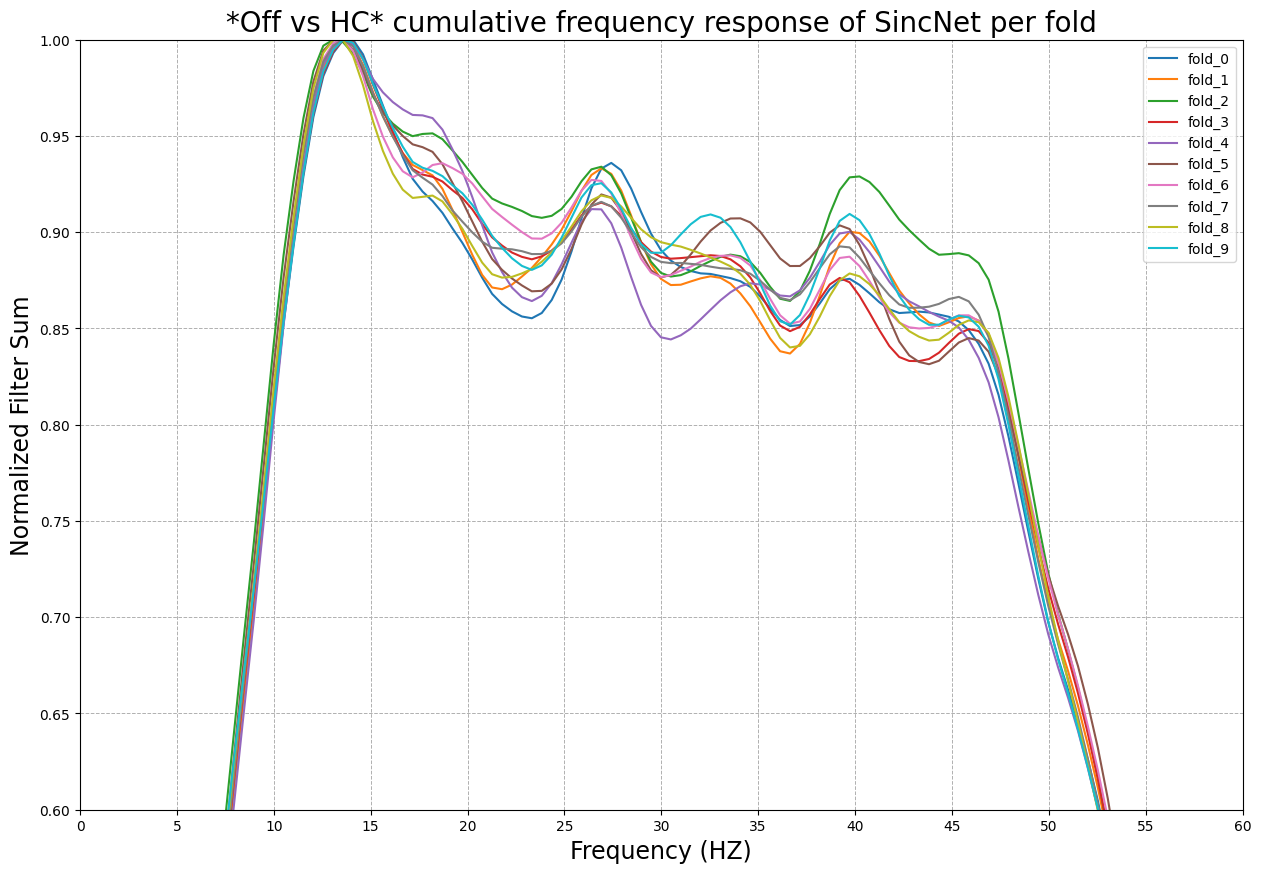

In [ ]:
epoch = 399
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')

x=np.linspace(0,0.5,257)
y=np.linspace(-256,256,1000)
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      #plt.figure(1,figsize=(15,10))
      #plt.grid(linestyle='--', linewidth=0.7)
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
      #plt.plot(x,globals()['Sinc_filts_%s'%f][i,:])
      #plt.figure(2,figsize=(15,10))
      #plt.plot(y,np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000))))
      #plt.xlim([0,60])
      #plt.ylim([0,1])
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f]),label=label)

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([0.6,1])
plt.title('*Off vs HC* cumulative frequency response of SincNet per fold',fontsize=20)
plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('Frequency (HZ)',fontsize=17)
plt.ylabel('Normalized Filter Sum',fontsize=17)
plt.legend()
plt.show()



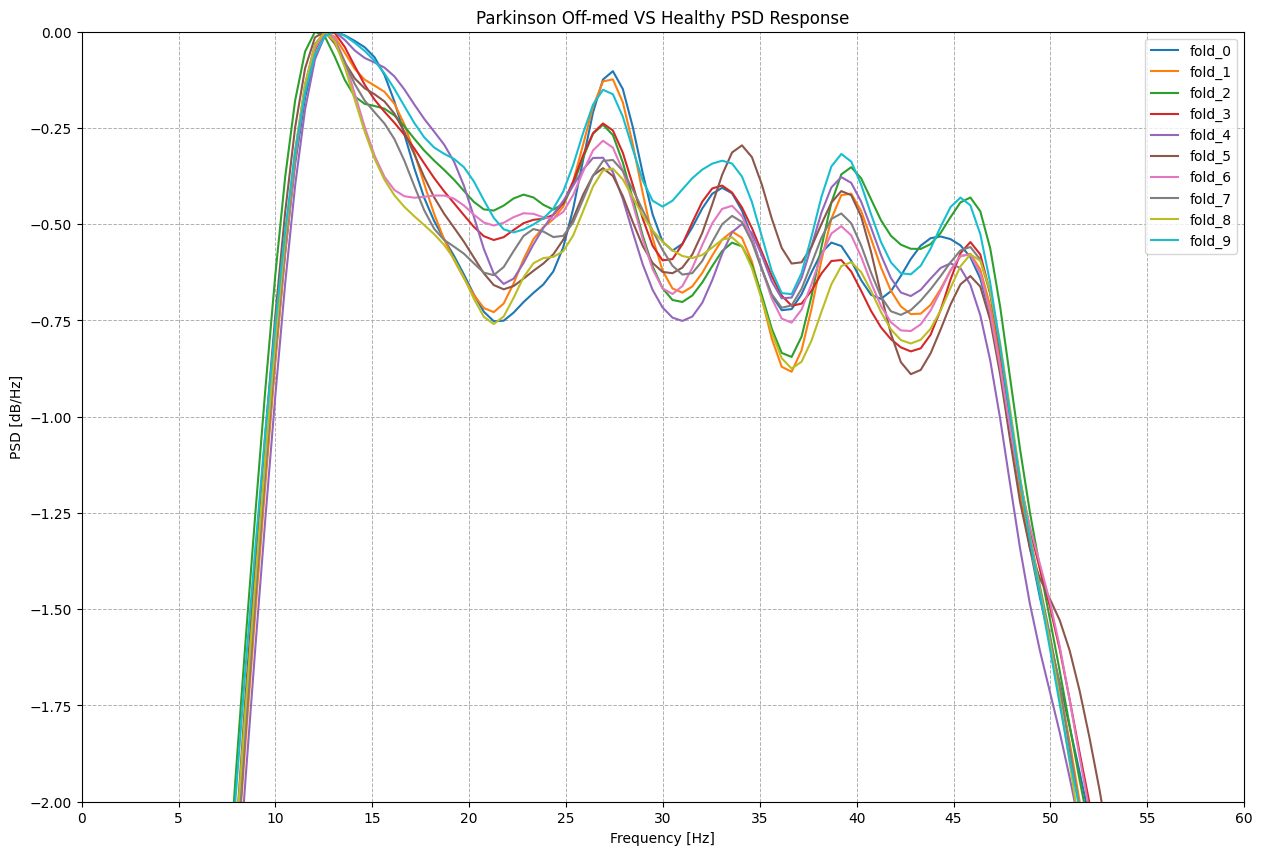

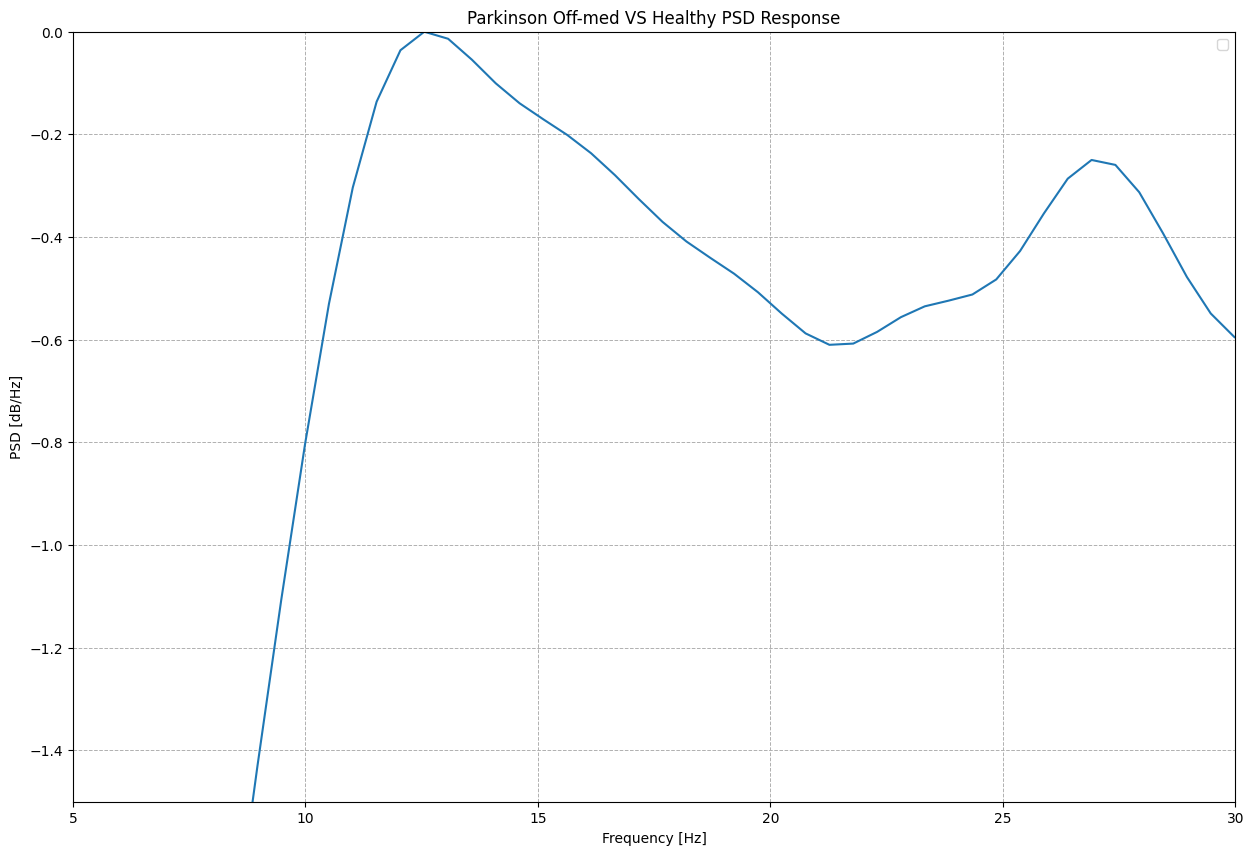

In [ ]:
# for Power Spectral Density
#z = np.linspace(-256,256,2000)
psd = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      psd[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),
       (np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['psd_%s'%f] = np.mean(psd,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,10*np.log10(np.abs(globals()['psd_%s'%f])/np.max(np.abs(globals()['psd_%s'%f]))),label=label)
    if f==0:
      psd_accumulated = globals()['psd_%s'%f]
    else:
      psd_accumulated = np.vstack((psd_accumulated,globals()['psd_%s'%f]))

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([-2,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson Off-med VS Healthy PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()
# ----
psd_accumulated = np.mean(psd_accumulated,axis=0)
plt.figure(1,figsize=(15,10))
plt.plot(y,10*np.log10(np.abs(psd_accumulated)/np.max(np.abs(psd_accumulated))))
plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([5,30])
plt.ylim([-1.5,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson Off-med VS Healthy PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()


# On vs. Hc

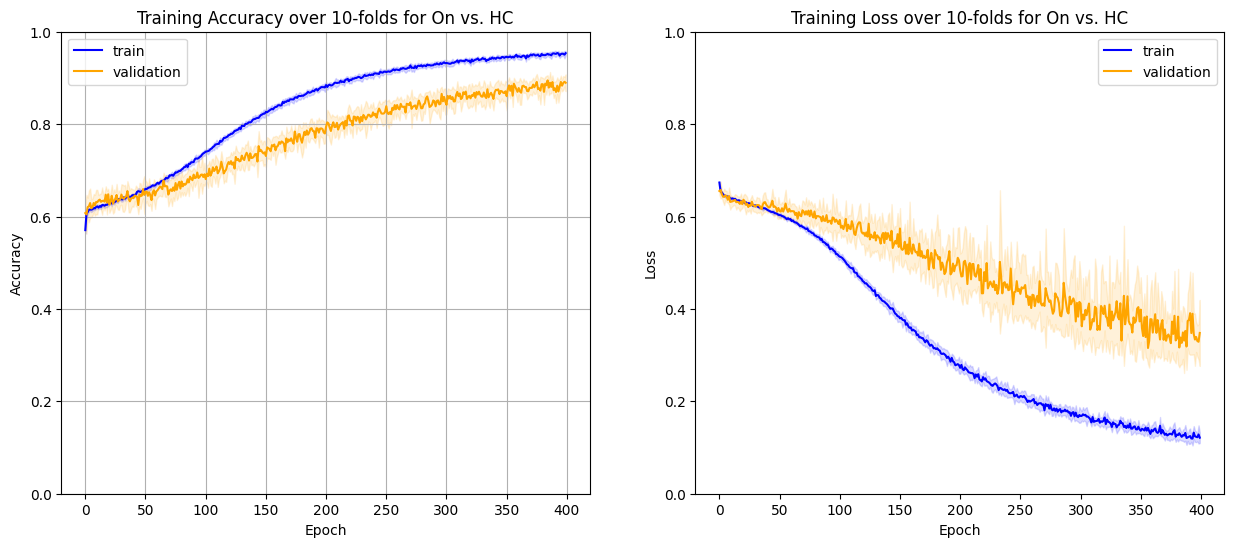

In [ ]:

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_history/On_vs_HC'+'/res_evaluation_file_fold'+str(f)+".res"
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_tr%s'%f]=[]
  globals()['loss_val%s'%f]=[]
  globals()['acc_tr%s'%f]=[]
  globals()['acc_val%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
    if elements[i]=='loss_tr':
      globals()['loss_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_tr":
      globals()['acc_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="loss_val":
      globals()['loss_val%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_val":
      globals()['acc_val%s'%f].append(float(elements[i+1]))
  if f==0:
    loss_tr = globals()['loss_tr%s'%f][0:400]
    acc_tr = globals()['acc_tr%s'%f][0:400]
    loss_val = globals()['loss_val%s'%f][0:400]
    acc_val = globals()['acc_val%s'%f][0:400]

  else:
    loss_tr = np.vstack((loss_tr,globals()['loss_tr%s'%f][0:400]))
    acc_tr = np.vstack((acc_tr,globals()['acc_tr%s'%f][0:400]))
    loss_val = np.vstack((loss_val,globals()['loss_val%s'%f][0:400]))
    acc_val = np.vstack((acc_val,globals()['acc_val%s'%f][0:400]))

loss_tr_mean = np.mean(loss_tr,axis=0)
loss_tr_std = np.std(loss_tr, axis=0)
acc_tr_mean = np.mean(acc_tr,axis=0)
acc_tr_std = np.std(acc_tr, axis=0)
loss_val_mean = np.mean(loss_val,axis=0)
loss_val_std = np.std(loss_val, axis=0)
acc_val_mean = np.mean(acc_val,axis=0)
acc_val_std = np.std(acc_val, axis=0)
# --------------------

plt.figure(figsize=([15,6]))
plt.subplot(1,2,1)
plt.plot(acc_tr_mean,color='blue',label='train')
plt.fill_between(range(400),acc_tr_mean + acc_tr_std,
                 acc_tr_mean - acc_tr_std, alpha=0.15, color='blue')
plt.plot(acc_val_mean,label='validation',color = 'orange')
plt.fill_between(range(400),acc_val_mean + acc_val_std,
                 acc_val_mean - acc_val_std, alpha=0.15, color='orange')

plt.legend()
plt.ylim([0,1])
#plt.xlim([25,29])
plt.title('Training Accuracy over 10-folds for On vs. HC')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()

plt.subplot(1,2,2)
plt.plot(loss_tr_mean,label='train', color='blue')
plt.fill_between(range(400),loss_tr_mean + loss_tr_std,
                 loss_tr_mean - loss_tr_std, alpha=0.15, color='blue')
plt.plot(loss_val_mean,label='validation',color='orange')
plt.fill_between(range(400),loss_val_mean + loss_val_std,
                 loss_val_mean - loss_val_std, alpha=0.15, color='orange')
plt.legend()
plt.ylim([0,1])
plt.title('Training Loss over 10-folds for On vs. HC')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.show()

fold: 0, acc: 0.899113, Sensitivity: 0.896313, Specificity: 0.901709, Precision: 0.894253, F_score: 0.895282
fold: 1, acc: 0.856826, Sensitivity: 0.759414, Specificity: 0.966903, Precision: 0.962865, F_score: 0.849123
fold: 2, acc: 0.901221, Sensitivity: 0.872146, Specificity: 0.928726, Precision: 0.920482, F_score: 0.895662
fold: 3, acc: 0.852386, Sensitivity: 0.937759, Specificity: 0.754177, Precision: 0.814414, F_score: 0.871745
fold: 4, acc: 0.887902, Sensitivity: 0.835784, Specificity: 0.931034, Precision: 0.909333, F_score: 0.871009
fold: 5, acc: 0.834628, Sensitivity: 0.867882, Specificity: 0.803030, Precision: 0.807203, F_score: 0.836443
fold: 6, acc: 0.951165, Sensitivity: 0.983721, Specificity: 0.921444, Precision: 0.919565, F_score: 0.950562
fold: 7, acc: 0.869034, Sensitivity: 0.867679, Specificity: 0.870455, Precision: 0.875274, F_score: 0.871460
fold: 8, acc: 0.890122, Sensitivity: 0.923567, Specificity: 0.853488, Precision: 0.873494, F_score: 0.897833
fold: 9, acc: 0.925

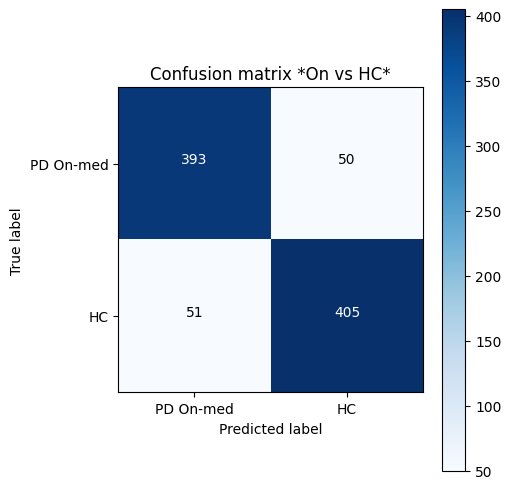

In [ ]:
for f in range(10):
  file_path = '/content/drive/MyDrive/COLAB/project/Network_history/'+'res_test_file_fold'+str(f)+'_On_vs_HC'+'.res'
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_test%s'%f]=[]
  globals()['acc_test%s'%f]=[]
  globals()['Sensitivity%s'%f]=[]
  globals()['Specificity%s'%f]=[]
  globals()['Precision%s'%f]=[]
  globals()['F_score%s'%f]=[]
  globals()['TP%s'%f]=[]
  globals()['TN%s'%f]=[]
  globals()['FP%s'%f]=[]
  globals()['FN%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
      if elements[i]=="loss_test":
        globals()['loss_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="acc_test":
        globals()['acc_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Sensitivity":
        globals()['Sensitivity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Specificity":
        globals()['Specificity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Precision":
        globals()['Precision%s'%f].append(float(elements[i+1]))
      elif elements[i]=="F_score":
        globals()['F_score%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TP":
        globals()['TP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TN":
        globals()['TN%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FP":
        globals()['FP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FN":
        globals()['FN%s'%f].append(float(elements[i+1]))

  #print("acc: %f, loss: %f" %  (f, np.array(acc_test_mean)))

  if f==0:
    loss_test = globals()['loss_test%s'%f][-1]
    acc_test = globals()['acc_test%s'%f][-1]
    Sensitivity = globals()['Sensitivity%s'%f][-1]
    Specificity = globals()['Specificity%s'%f][-1]
    Precision = globals()['Precision%s'%f][-1]
    F_score = globals()['F_score%s'%f][-1]
    TP = globals()['TP%s'%f][-1]
    TN = globals()['TN%s'%f][-1]
    FP = globals()['FP%s'%f][-1]
    FN = globals()['FN%s'%f][-1]
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test), np.array(Sensitivity),np.array(Specificity), np.array(Precision),np.array(F_score)))

  else:
    loss_test = np.vstack((loss_test,globals()['loss_test%s'%f][-1]))
    acc_test = np.vstack((acc_test,globals()['acc_test%s'%f][-1]))
    Sensitivity = np.vstack((Sensitivity,globals()['Sensitivity%s'%f][-1]))
    Specificity = np.vstack((Specificity,globals()['Specificity%s'%f][-1]))
    Precision = np.vstack((Precision,globals()['Precision%s'%f][-1]))
    F_score = np.vstack((F_score,globals()['F_score%s'%f][-1]))
    TP = np.vstack((TP,globals()['TP%s'%f][-1]))
    TN = np.vstack((TN,globals()['TN%s'%f][-1]))
    FP = np.vstack((FP,globals()['FP%s'%f][-1]))
    FN = np.vstack((FN,globals()['FN%s'%f][-1]))
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test[f]), np.array(Sensitivity[f]),np.array(Specificity[f]), np.array(Precision[f]),np.array(F_score[f])))

loss_test_mean = np.mean(loss_test,axis=0)
acc_test_mean = np.mean(acc_test,axis=0)
Sensitivity_mean = np.mean(Sensitivity,axis=0)
Specificity_mean = np.mean(Specificity,axis=0)
Precision_mean = np.mean(Precision,axis=0)
F_score_mean = np.mean(F_score,axis=0)
TP_mean = np.mean(TP,axis=0)
TN_mean = np.mean(TN,axis=0)
FP_mean = np.mean(FP,axis=0)
FN_mean = np.mean(FN,axis=0)

# confusion matrix
confusion_mtx = np.array([[int(TP_mean), int(FP_mean)], [int(FN_mean), int(TN_mean)]])
print("confusion matrix=\n",confusion_mtx)
class_names=['PD On-med','HC']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix *On vs HC*',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_mtx, class_names)


print("loss_test_mean: %f, acc_test_mean: %f" %  (np.array(loss_test_mean), np.array(acc_test_mean)))
print("Sensitivity_mean: %f, Specificity_mean: %f" %  (np.array(Sensitivity_mean), np.array(Specificity_mean)))
print("F_score_mean: %f, Precision_mean: %f" %  (np.array(F_score_mean), np.array(Precision_mean)))



In [ ]:
loss_test.shape


(10, 1)

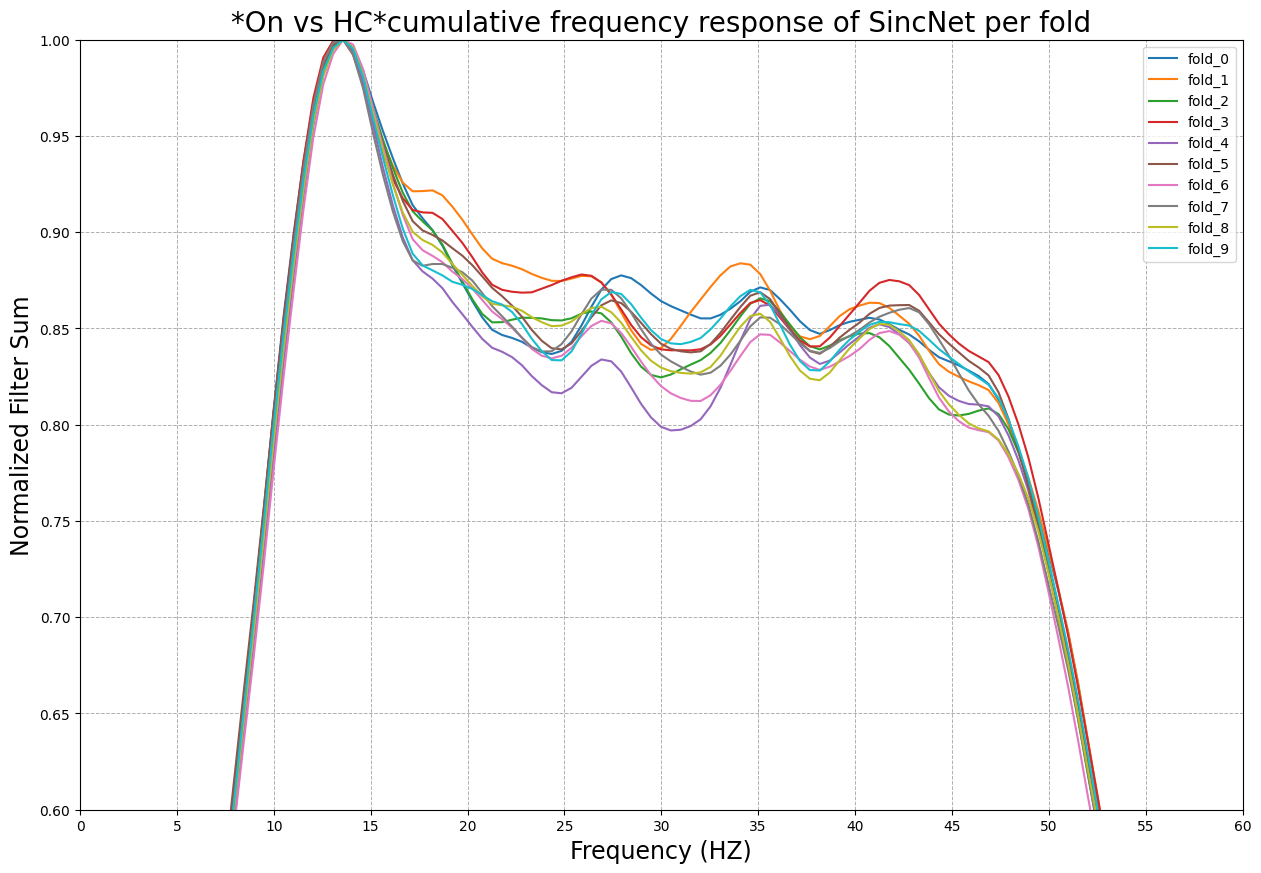

In [ ]:
epoch = 399
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_HC/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')

x=np.linspace(0,0.5,257)
y=np.linspace(-256,256,1000)
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      #plt.figure(1,figsize=(15,10))
      #plt.grid(linestyle='--', linewidth=0.7)
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
      #plt.plot(x,globals()['Sinc_filts_%s'%f][i,:])
      #plt.figure(2,figsize=(15,10))
      #plt.plot(y,np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000))))
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f]),label=label)

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([0.6,1])
plt.title('*On vs HC*cumulative frequency response of SincNet per fold',fontsize=20)
plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('Frequency (HZ)',fontsize=17)
plt.ylabel('Normalized Filter Sum',fontsize=17)
plt.legend()
plt.show()



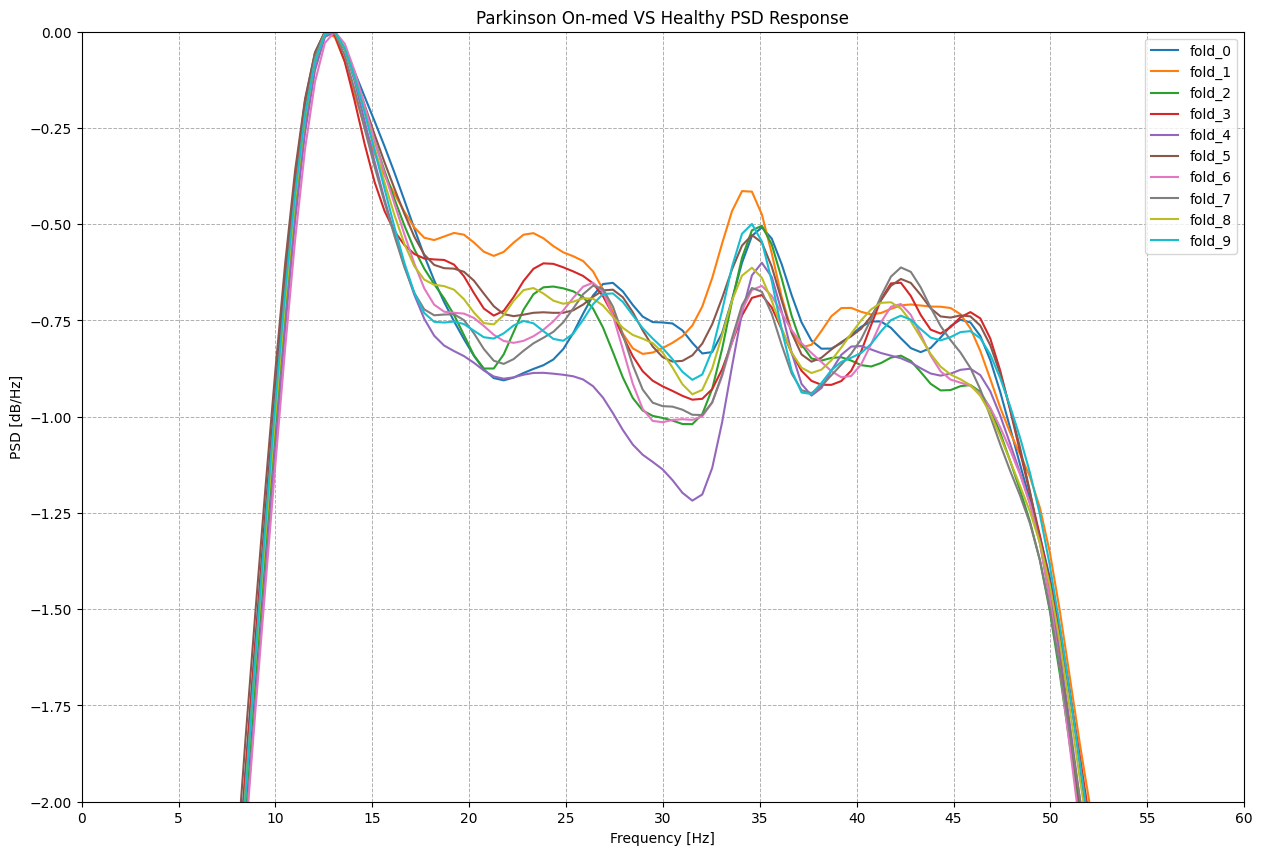

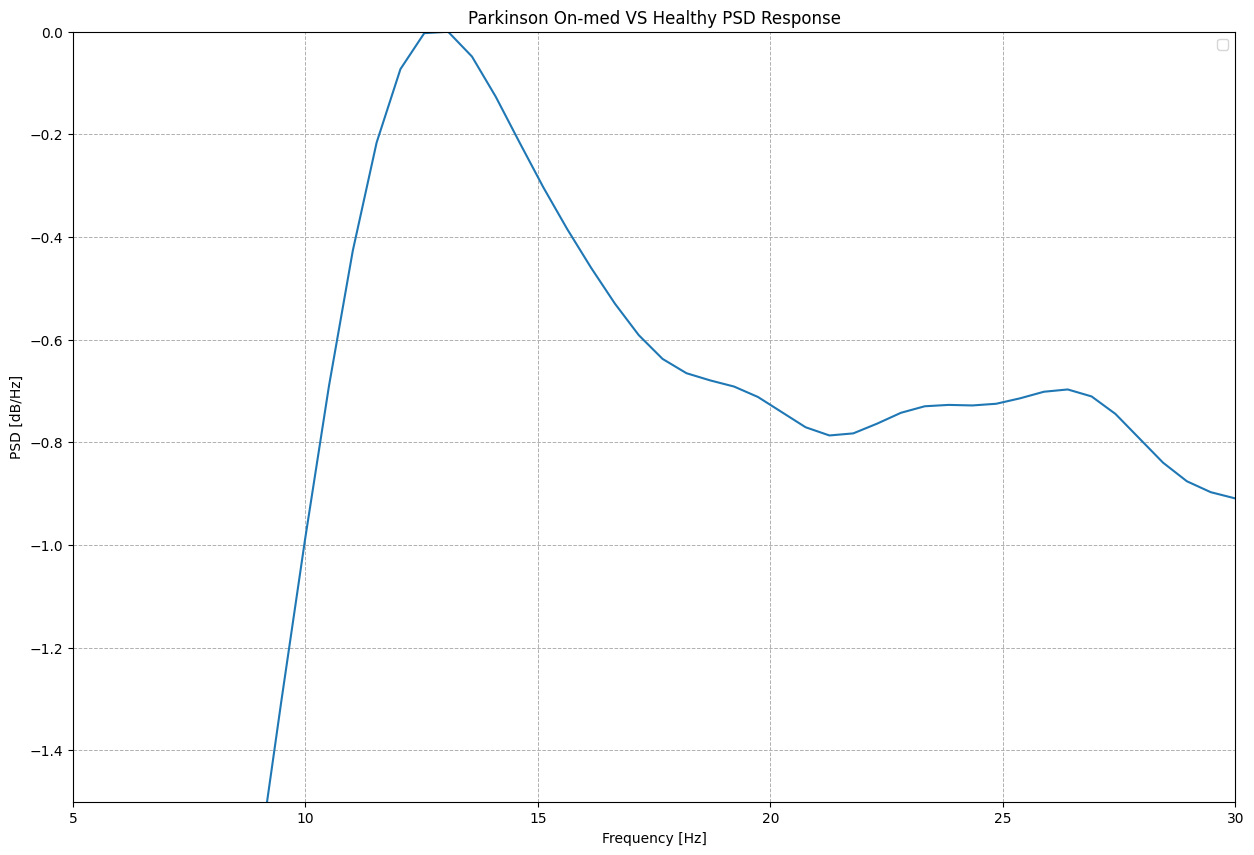

In [ ]:
# for Power Spectral Density
#z = np.linspace(-256,256,2000)
psd = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      psd[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),
       (np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['psd_%s'%f] = np.mean(psd,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,10*np.log10(np.abs(globals()['psd_%s'%f])/np.max(np.abs(globals()['psd_%s'%f]))),label=label)
    if f==0:
      psd_accumulated = globals()['psd_%s'%f]
    else:
      psd_accumulated = np.vstack((psd_accumulated,globals()['psd_%s'%f]))

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([-2,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson On-med VS Healthy PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()
# ----
psd_accumulated = np.mean(psd_accumulated,axis=0)
plt.figure(1,figsize=(15,10))
plt.plot(y,10*np.log10(np.abs(psd_accumulated)/np.max(np.abs(psd_accumulated))))
plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([5,30])
plt.ylim([-1.5,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson On-med VS Healthy PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()


# On vs. Off

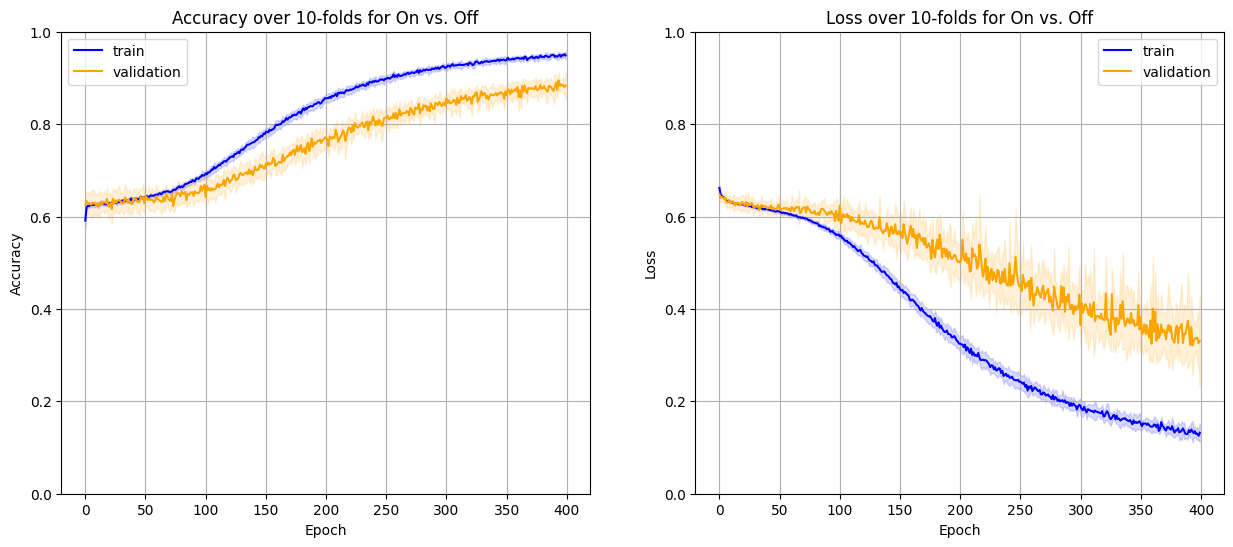

In [ ]:

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_history/On_vs_Off'+'/res_evaluation_file_fold'+str(f)+".res"
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_tr%s'%f]=[]
  globals()['loss_val%s'%f]=[]
  globals()['acc_tr%s'%f]=[]
  globals()['acc_val%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
    if elements[i]=='loss_tr':
      globals()['loss_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_tr":
      globals()['acc_tr%s'%f].append(float(elements[i+1]))
    elif elements[i]=="loss_val":
      globals()['loss_val%s'%f].append(float(elements[i+1]))
    elif elements[i]=="acc_val":
      globals()['acc_val%s'%f].append(float(elements[i+1]))
  if f==0:
    loss_tr = globals()['loss_tr%s'%f][0:400]
    acc_tr = globals()['acc_tr%s'%f][0:400]
    loss_val = globals()['loss_val%s'%f][0:400]
    acc_val = globals()['acc_val%s'%f][0:400]

  else:
    loss_tr = np.vstack((loss_tr,globals()['loss_tr%s'%f][0:400]))
    acc_tr = np.vstack((acc_tr,globals()['acc_tr%s'%f][0:400]))
    loss_val = np.vstack((loss_val,globals()['loss_val%s'%f][0:400]))
    acc_val = np.vstack((acc_val,globals()['acc_val%s'%f][0:400]))
loss_tr_mean = np.mean(loss_tr,axis=0)
loss_tr_std = np.std(loss_tr, axis=0)
acc_tr_mean = np.mean(acc_tr,axis=0)
acc_tr_std = np.std(acc_tr, axis=0)
loss_val_mean = np.mean(loss_val,axis=0)
loss_val_std = np.std(loss_val, axis=0)
acc_val_mean = np.mean(acc_val,axis=0)
acc_val_std = np.std(acc_val, axis=0)
# --------------------

plt.figure(figsize=([15,6]))
#plt.figsize
plt.subplot(1,2,1)
plt.plot(acc_tr_mean,color='blue',label='train')
plt.fill_between(range(400),acc_tr_mean + acc_tr_std,
                 acc_tr_mean - acc_tr_std, alpha=0.15, color='blue')
plt.plot(acc_val_mean,label='validation',color = 'orange')
plt.fill_between(range(400),acc_val_mean + acc_val_std,
                 acc_val_mean - acc_val_std, alpha=0.15, color='orange')
plt.legend()
plt.ylim([0,1])
#plt.xlim([25,29])
plt.title('Accuracy over 10-folds for On vs. Off')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid()
plt.subplot(1,2,2)
plt.plot(loss_tr_mean,label='train', color='blue')
plt.fill_between(range(400),loss_tr_mean + loss_tr_std,
                 loss_tr_mean - loss_tr_std, alpha=0.15, color='blue')
plt.plot(loss_val_mean,label='validation',color='orange')
plt.fill_between(range(400),loss_val_mean + loss_val_std,
                 loss_val_mean - loss_val_std, alpha=0.15, color='orange')

plt.legend()
plt.ylim([0,1])
plt.title('Loss over 10-folds for On vs. Off')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()


fold: 0, acc: 0.902825, Sensitivity: 0.928736, Specificity: 0.877778, Precision: 0.880174, F_score: 0.903803
fold: 1, acc: 0.833898, Sensitivity: 0.902273, Specificity: 0.766292, Precision: 0.792415, F_score: 0.843783
fold: 2, acc: 0.902715, Sensitivity: 0.965142, Specificity: 0.835294, Precision: 0.863548, F_score: 0.911523
fold: 3, acc: 0.864253, Sensitivity: 0.933962, Specificity: 0.800000, Precision: 0.811475, F_score: 0.868421
fold: 4, acc: 0.874434, Sensitivity: 0.803922, Specificity: 0.950588, Precision: 0.946154, F_score: 0.869258
fold: 5, acc: 0.902715, Sensitivity: 0.908277, Specificity: 0.897025, Precision: 0.900222, F_score: 0.904232
fold: 6, acc: 0.872172, Sensitivity: 0.895299, Specificity: 0.846154, Precision: 0.867495, F_score: 0.881178
fold: 7, acc: 0.899321, Sensitivity: 0.888112, Specificity: 0.909890, Precision: 0.902844, F_score: 0.895417
fold: 8, acc: 0.898190, Sensitivity: 0.913043, Specificity: 0.885106, Precision: 0.875000, F_score: 0.893617
fold: 9, acc: 0.899

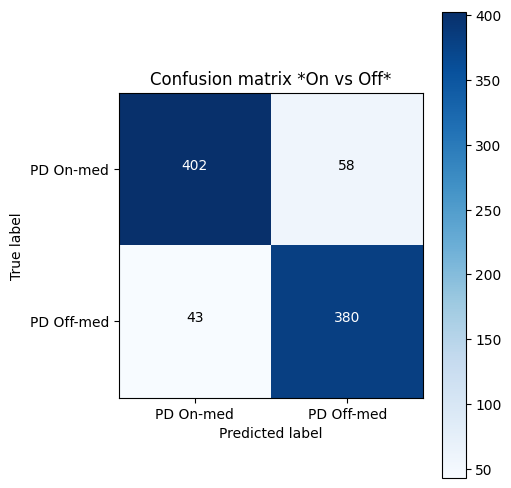

In [ ]:
for f in range(10):
  file_path = '/content/drive/MyDrive/COLAB/project/Network_history/On_vs_Off/'+'res_test_file_fold'+str(f)+'.res'
  with open(file_path,'r') as file:
    contents = file.read()
  globals()['loss_test%s'%f]=[]
  globals()['acc_test%s'%f]=[]
  globals()['Sensitivity%s'%f]=[]
  globals()['Specificity%s'%f]=[]
  globals()['Precision%s'%f]=[]
  globals()['F_score%s'%f]=[]
  globals()['TP%s'%f]=[]
  globals()['TN%s'%f]=[]
  globals()['FP%s'%f]=[]
  globals()['FN%s'%f]=[]
  elements = re.split(r'[=,\s]+', contents)
  for i in range(len(elements)):
      if elements[i]=="loss_test":
        globals()['loss_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="acc_test":
        globals()['acc_test%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Sensitivity":
        globals()['Sensitivity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Specificity":
        globals()['Specificity%s'%f].append(float(elements[i+1]))
      elif elements[i]=="Precision":
        globals()['Precision%s'%f].append(float(elements[i+1]))
      elif elements[i]=="F_score":
        globals()['F_score%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TP":
        globals()['TP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="TN":
        globals()['TN%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FP":
        globals()['FP%s'%f].append(float(elements[i+1]))
      elif elements[i]=="FN":
        globals()['FN%s'%f].append(float(elements[i+1]))

  #print("fold: %f, loss: %f" %  (f, np.array(acc_test_mean)))

  if f==0:
    loss_test = globals()['loss_test%s'%f][-1]
    acc_test = globals()['acc_test%s'%f][-1]
    Sensitivity = globals()['Sensitivity%s'%f][-1]
    Specificity = globals()['Specificity%s'%f][-1]
    Precision = globals()['Precision%s'%f][-1]
    F_score = globals()['F_score%s'%f][-1]
    TP = globals()['TP%s'%f][-1]
    TN = globals()['TN%s'%f][-1]
    FP = globals()['FP%s'%f][-1]
    FN = globals()['FN%s'%f][-1]
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test), np.array(Sensitivity),np.array(Specificity), np.array(Precision),np.array(F_score)))

  else:
    loss_test = np.vstack((loss_test,globals()['loss_test%s'%f][-1]))
    acc_test = np.vstack((acc_test,globals()['acc_test%s'%f][-1]))
    Sensitivity = np.vstack((Sensitivity,globals()['Sensitivity%s'%f][-1]))
    Specificity = np.vstack((Specificity,globals()['Specificity%s'%f][-1]))
    Precision = np.vstack((Precision,globals()['Precision%s'%f][-1]))
    F_score = np.vstack((F_score,globals()['F_score%s'%f][-1]))
    TP = np.vstack((TP,globals()['TP%s'%f][-1]))
    TN = np.vstack((TN,globals()['TN%s'%f][-1]))
    FP = np.vstack((FP,globals()['FP%s'%f][-1]))
    FN = np.vstack((FN,globals()['FN%s'%f][-1]))
    print("fold: %i, acc: %f, Sensitivity: %f, Specificity: %f, Precision: %f, F_score: %f" % (f,np.array(acc_test[f]), np.array(Sensitivity[f]),np.array(Specificity[f]), np.array(Precision[f]),np.array(F_score[f])))



loss_test_mean = np.mean(loss_test,axis=0)
acc_test_mean = np.mean(acc_test,axis=0)
Sensitivity_mean = np.mean(Sensitivity,axis=0)
Specificity_mean = np.mean(Specificity,axis=0)
Precision_mean = np.mean(Precision,axis=0)
F_score_mean = np.mean(F_score,axis=0)
TP_mean = np.mean(TP,axis=0)
TN_mean = np.mean(TN,axis=0)
FP_mean = np.mean(FP,axis=0)
FN_mean = np.mean(FN,axis=0)
Kappa = 2 * (TP_mean * TN_mean - FN_mean * FP_mean) / (TP_mean * FN_mean + TP_mean * FP_mean + 2 * TP_mean * TN_mean + FN_mean*FN_mean + FN_mean * TN_mean + FP_mean*FP_mean + FP_mean * TN_mean)
print("Kappa_mean: %f" % ((Kappa)))

# confusion matrix
confusion_mtx = np.array([[int(TP_mean), int(FP_mean)], [int(FN_mean), int(TN_mean)]])
print("confusion matrix=\n",confusion_mtx)
class_names=['PD On-med','PD Off-med']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix *On vs Off*',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(confusion_mtx, class_names)


print("loss_test_mean: %f, acc_test_mean: %f" %  (np.array(loss_test_mean), np.array(acc_test_mean)))
print("Sensitivity_mean: %f, Specificity_mean: %f" %  (np.array(Sensitivity_mean), np.array(Specificity_mean)))
print("F_score_mean: %f, Precision_mean: %f" %  (np.array(F_score_mean), np.array(Precision_mean)))



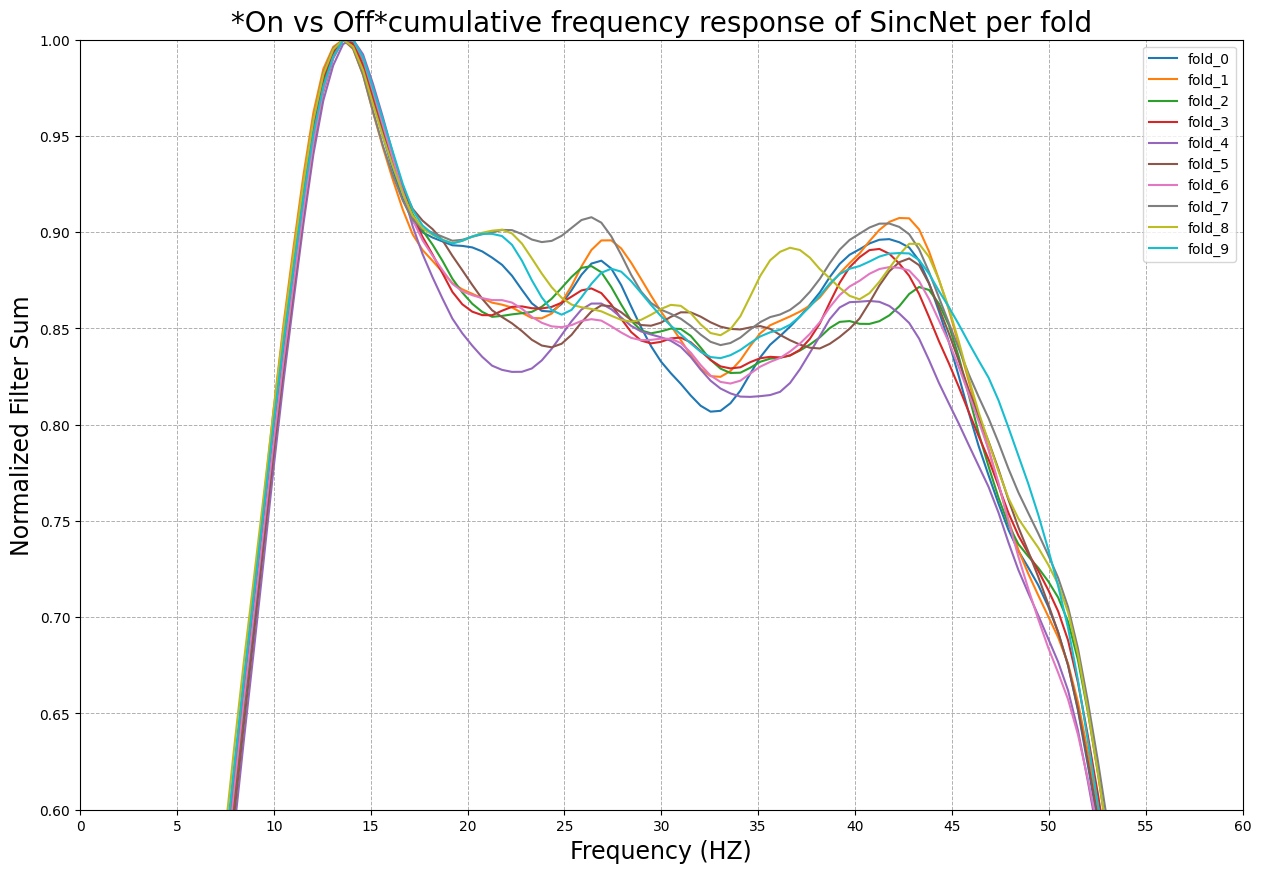

In [ ]:
epoch = 399
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_Off/On_vs_Off/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')

x=np.linspace(0,0.5,257)
y=np.linspace(-256,256,1000)
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      #plt.figure(1,figsize=(15,10))
      #plt.grid(linestyle='--', linewidth=0.7)
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
      #plt.plot(x,globals()['Sinc_filts_%s'%f][i,:])
      #plt.figure(2,figsize=(15,10))
      #plt.plot(y,np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000))))
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f]),label=label)

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([0.6,1])
plt.title('*On vs Off*cumulative frequency response of SincNet per fold',fontsize=20)
plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('Frequency (HZ)',fontsize=17)
plt.ylabel('Normalized Filter Sum',fontsize=17)
plt.legend()
plt.show()



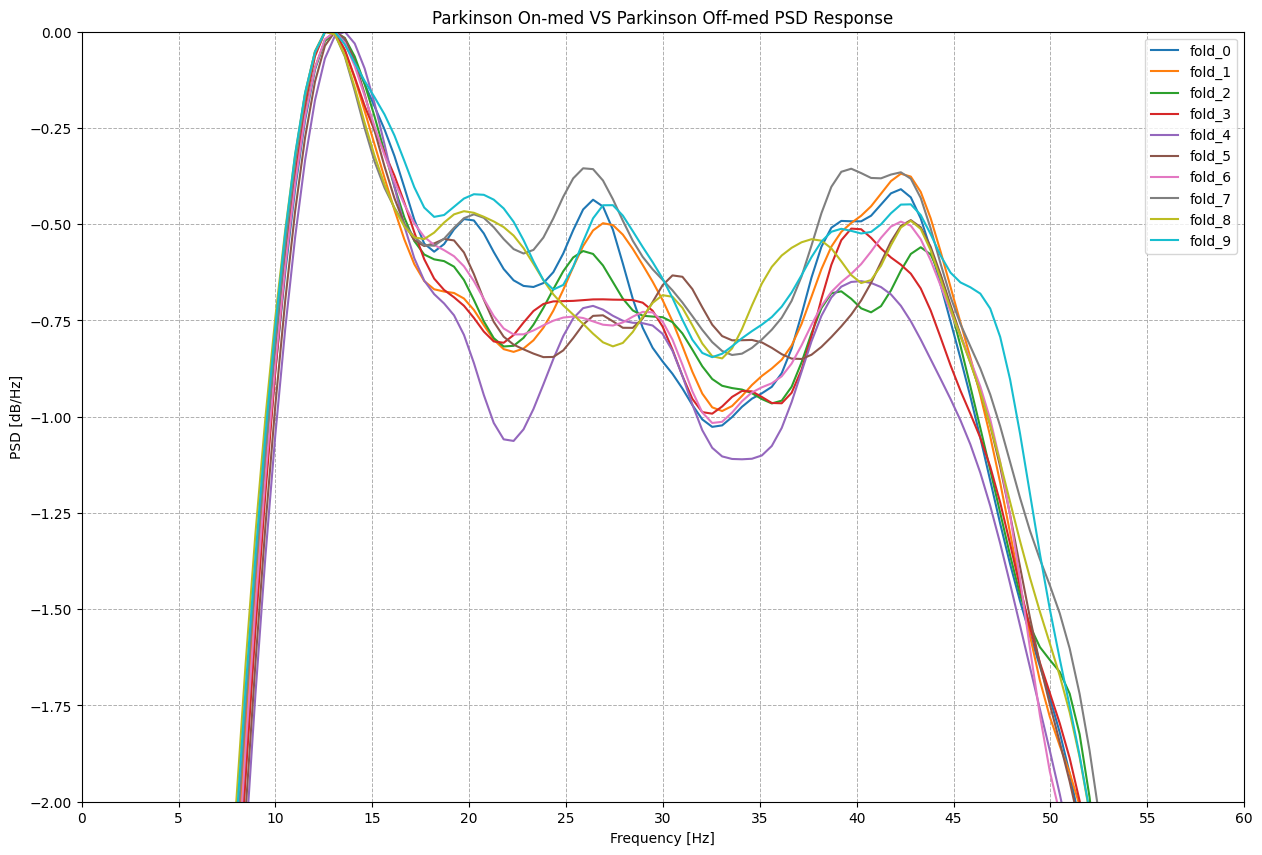

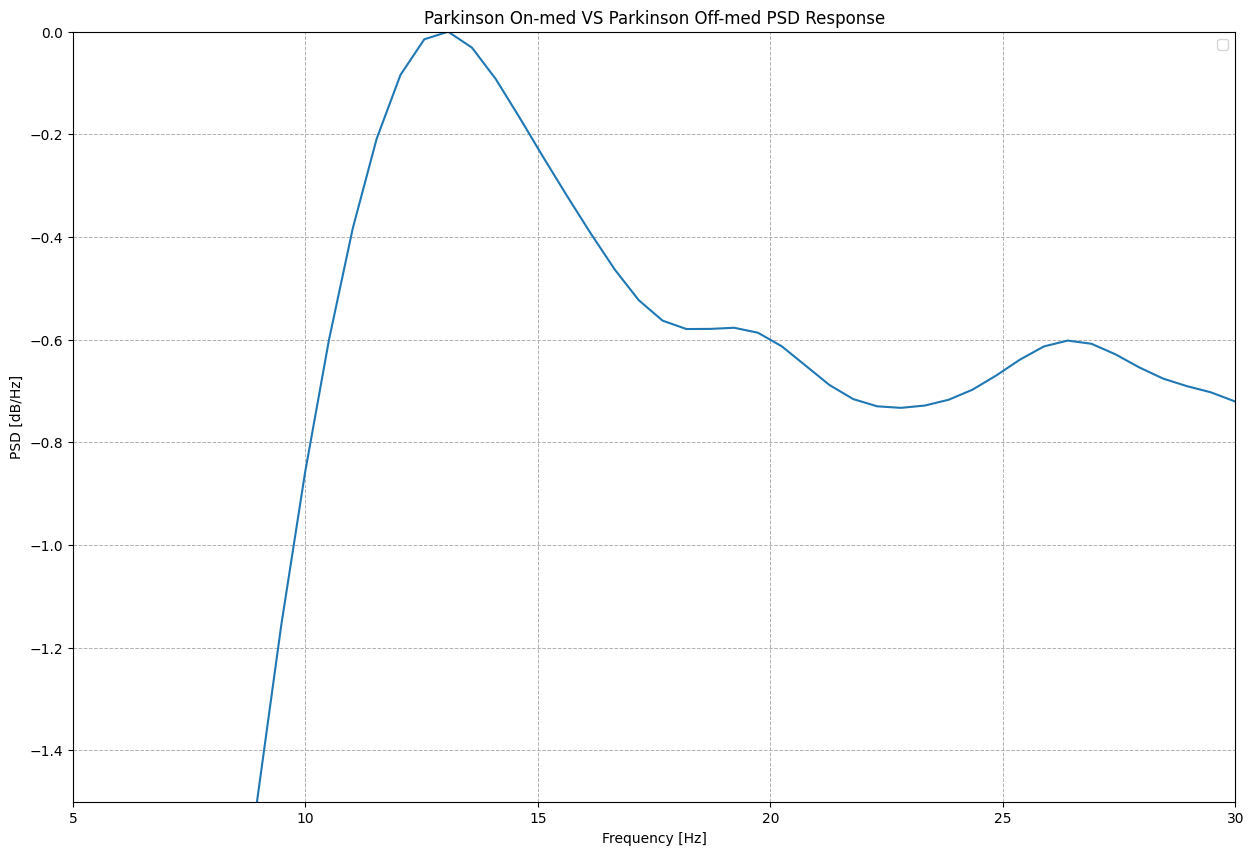

In [ ]:
# for Power Spectral Density
#z = np.linspace(-256,256,2000)
psd = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      psd[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),
       (np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['psd_%s'%f] = np.mean(psd,axis=0)
    plt.figure(1,figsize=(15,10))
    label = f'fold_{f}'
    plt.plot(y,10*np.log10(np.abs(globals()['psd_%s'%f])/np.max(np.abs(globals()['psd_%s'%f]))),label=label)
    if f==0:
      psd_accumulated = globals()['psd_%s'%f]
    else:
      psd_accumulated = np.vstack((psd_accumulated,globals()['psd_%s'%f]))

plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([0,60])
plt.ylim([-2,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson On-med VS Parkinson Off-med PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()
# ----
psd_accumulated = np.mean(psd_accumulated,axis=0)
plt.figure(1,figsize=(15,10))
plt.plot(y,10*np.log10(np.abs(psd_accumulated)/np.max(np.abs(psd_accumulated))))
plt.xticks(np.arange(0, max(y)+1, 5,))
plt.xlim([5,30])
plt.ylim([-1.5,0])
plt.grid(linestyle='--', linewidth=0.7)
plt.title('Parkinson On-med VS Parkinson Off-med PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()
plt.show()


# For other tests

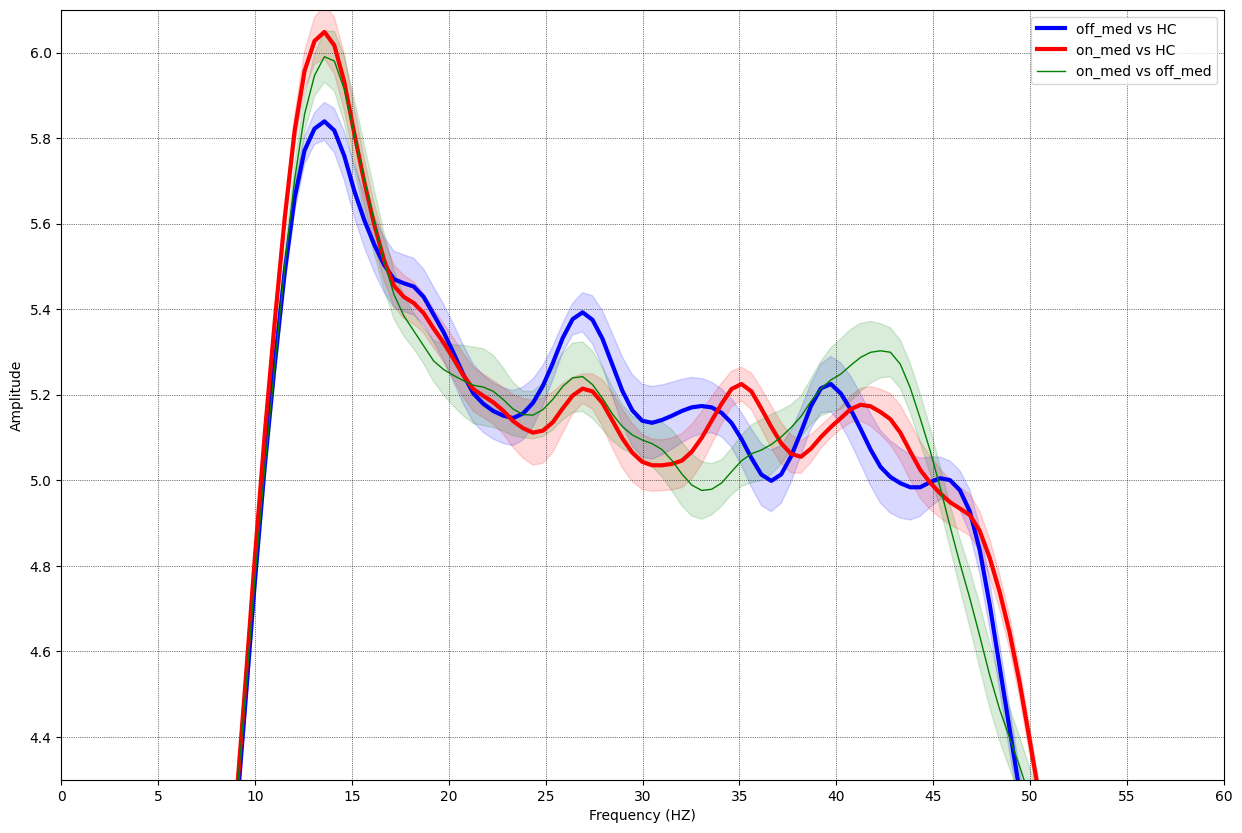

In [ ]:
# **************** reading Off vs HC
epoch = 399
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    #cumulative_Off_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      cumulative_Off_vs_HC = globals()['cumulative_%s'%f]
    else:
      cumulative_Off_vs_HC = np.vstack((cumulative_Off_vs_HC,globals()['cumulative_%s'%f]))
# **************** reading On vs HC
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_HC/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    #cumulative_On_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      cumulative_On_vs_HC = globals()['cumulative_%s'%f]
    else:
      cumulative_On_vs_HC = np.vstack((cumulative_On_vs_HC,globals()['cumulative_%s'%f]))
# **************** reading On vs Off
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_Off/On_vs_Off/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
cumulative = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      cumulative[i][:] = np.fft.fftshift(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)))
    globals()['cumulative_%s'%f] = np.mean(cumulative,axis=0)
    #cumulative_On_vs_Off = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      cumulative_On_vs_Off = globals()['cumulative_%s'%f]
    else:
      cumulative_On_vs_Off = np.vstack((cumulative_On_vs_Off,globals()['cumulative_%s'%f]))
# --------------------------------------------- Plot
#plt.figure(1,figsize=(15,10))
cumulative_Off_vs_HC_avg = np.mean(cumulative_Off_vs_HC,axis=0)
cumulative_Off_vs_HC_std = np.std(cumulative_Off_vs_HC,axis=0)

cumulative_On_vs_HC_avg = np.mean(cumulative_On_vs_HC,axis=0)
cumulative_On_vs_HC_std = np.std(cumulative_On_vs_HC,axis=0)

cumulative_On_vs_Off_avg = np.mean(cumulative_On_vs_Off,axis=0)
cumulative_On_vs_Off_std = np.std(cumulative_On_vs_Off,axis=0)

fig, ax = plt.subplots(figsize=(15, 10))
x=np.linspace(0,0.5,257)
y=np.linspace(-256,256,1000)
ax.plot(y,cumulative_Off_vs_HC_avg,linewidth=3,color='blue',label='off_med vs HC')
plt.fill_between(y, cumulative_Off_vs_HC_avg + cumulative_Off_vs_HC_std,
                 cumulative_Off_vs_HC_avg - cumulative_Off_vs_HC_std, alpha=0.15, color='blue')

ax.plot(y,cumulative_On_vs_HC_avg,linewidth=3,color='red',label='on_med vs HC')
plt.fill_between(y, cumulative_On_vs_HC_avg + cumulative_On_vs_HC_std,
                 cumulative_On_vs_HC_avg - cumulative_On_vs_HC_std, alpha=0.15, color='red')

ax.plot(y,cumulative_On_vs_Off_avg,linewidth=1,linestyle='-',color='green',label='on_med vs off_med')
plt.fill_between(y, cumulative_On_vs_Off_avg + cumulative_On_vs_Off_std,
                 cumulative_On_vs_Off_avg - cumulative_On_vs_Off_std, alpha=0.15, color='green')

plt.xticks(np.arange(0, max(y)+1, 5,))

plt.xlim([0,60])
plt.ylim([4.3,6.1])
plt.grid(linestyle=':', linewidth=0.5, color='k')
plt.xlabel('Frequency (HZ)')
plt.ylabel('Amplitude')
plt.legend()
'''
colors = ['gray', '#86DC3D', 'yellow','yellow','red','red','red','#223BC9'] # Persian Blue
#column_boundaries = [1.5, 3.5, 5.5,7.5]
# Create the background spans
ax.axvspan(0, 4, facecolor=colors[0], alpha=0.2)
ax.axvspan(4, 8, facecolor=colors[1], alpha=0.3)
ax.axvspan(8, 10, facecolor=colors[2], alpha=0.2)# low alpha
ax.axvspan(10, 13, facecolor=colors[3], alpha=0.3)# high alpha
ax.axvspan(13, 15, facecolor=colors[4], alpha=0.1)# low beta
ax.axvspan(15, 20, facecolor=colors[5], alpha=0.2)# mid beta
ax.axvspan(20, 30, facecolor=colors[6], alpha=0.3)# high beta
ax.axvspan(30, 70, facecolor=colors[7], alpha=0.3)
for i in range(0, 60, 5):
    ax.axvline(i, color='black', linestyle='--', linewidth=0.5)
'''
plt.show()


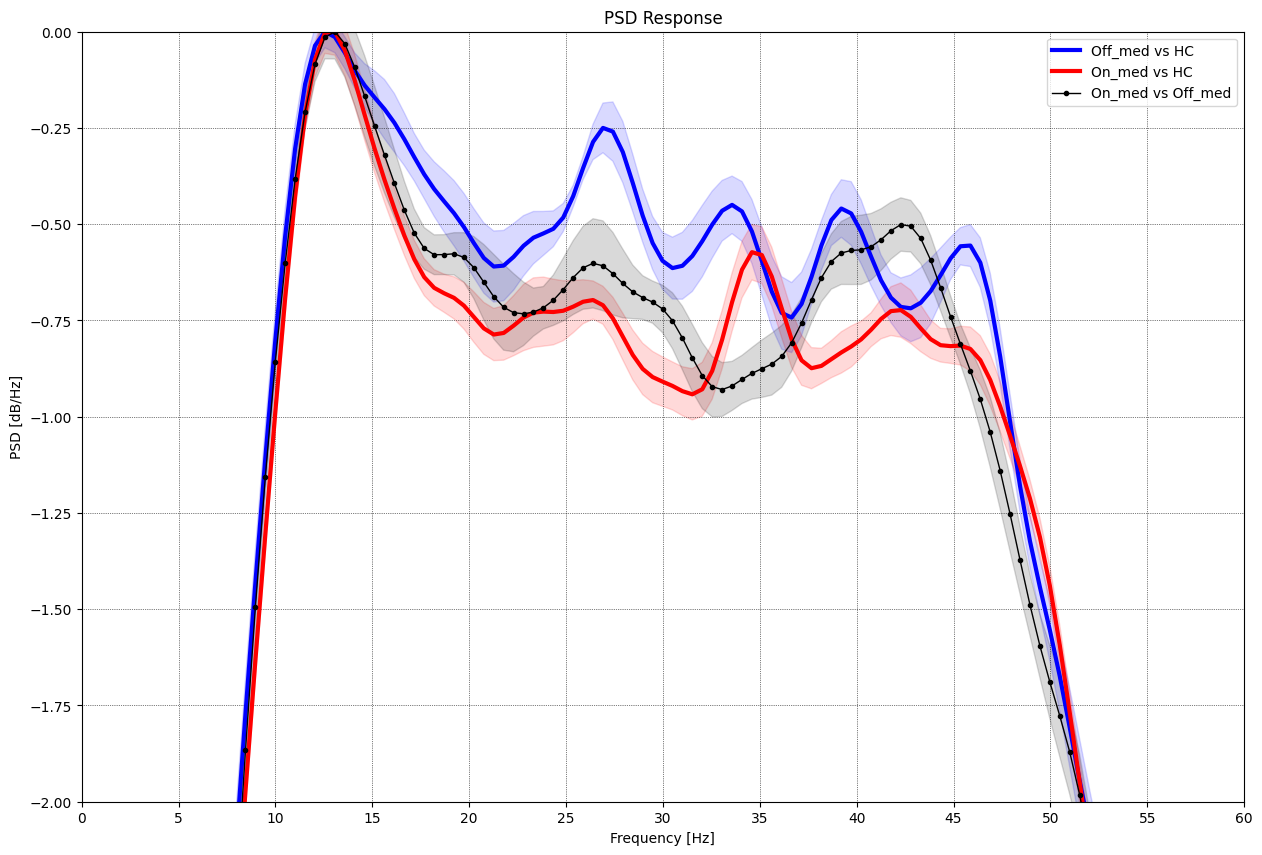

In [ ]:
# for calculation of """"""""""""""""""""""""PSD"""""""""""""""""""""""""
# **************** reading Off vs HC

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_Off_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_Off_vs_HC = globals()['PSD_%s'%f]
    else:
      PSD_Off_vs_HC = np.vstack((PSD_Off_vs_HC,globals()['PSD_%s'%f]))
# **************** reading On vs HC
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_HC/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_HC = globals()['PSD_%s'%f]
    else:
      PSD_On_vs_HC = np.vstack((PSD_On_vs_HC,globals()['PSD_%s'%f]))
# **************** reading On vs Off
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_Off/On_vs_Off/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_Off = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_Off = globals()['PSD_%s'%f]
    else:
      PSD_On_vs_Off = np.vstack((PSD_On_vs_Off,globals()['PSD_%s'%f]))

#data(k,q,:)=mean(temp_val(:,1001:2000),1);
PSD_Off_vs_HC_avg = np.mean(PSD_Off_vs_HC,axis = 0)
PSD_Off_vs_HC_avg = 10*np.log10(np.abs(PSD_Off_vs_HC_avg)/np.max(np.abs(PSD_Off_vs_HC_avg)))
PSD_Off_vs_HC_std = np.std(10*np.log10(np.abs(PSD_Off_vs_HC)/np.max(np.abs(PSD_Off_vs_HC))),axis = 0)

PSD_On_vs_HC_avg = np.mean(PSD_On_vs_HC,axis = 0)
PSD_On_vs_HC_avg = 10*np.log10(np.abs(PSD_On_vs_HC_avg)/np.max(np.abs(PSD_On_vs_HC_avg)))
PSD_On_vs_HC_std = np.std(10*np.log10(np.abs(PSD_On_vs_HC)/np.max(np.abs(PSD_On_vs_HC))),axis = 0)

PSD_On_vs_Off_avg = np.mean(PSD_On_vs_Off,axis = 0)
PSD_On_vs_Off_avg = 10*np.log10(np.abs(PSD_On_vs_Off_avg)/np.max(np.abs(PSD_On_vs_Off_avg)))
PSD_On_vs_Off_std = np.std(10*np.log10(np.abs(PSD_On_vs_Off)/np.max(np.abs(PSD_On_vs_Off))),axis = 0)


z = np.linspace(-256,256,1000)# 256 is selected bc our fs is 512 which according to Nyquist, half freqs can be detected
plt.figure(1,figsize=(15,10))
plt.plot(z,PSD_Off_vs_HC_avg,linewidth=3,color='blue',label = 'Off_med vs HC')
plt.fill_between(y, PSD_Off_vs_HC_avg + PSD_Off_vs_HC_std,
                 PSD_Off_vs_HC_avg - PSD_Off_vs_HC_std, alpha=0.15, color='blue')

plt.plot(z,PSD_On_vs_HC_avg,linewidth=3,color='red',label = 'On_med vs HC')
plt.fill_between(y, PSD_On_vs_HC_avg + PSD_On_vs_HC_std,
                 PSD_On_vs_HC_avg - PSD_On_vs_HC_std, alpha=0.15, color='red')

plt.plot(z,PSD_On_vs_Off_avg,linewidth=1,color='black',label = 'On_med vs Off_med',marker='.')
plt.fill_between(y, PSD_On_vs_Off_avg + PSD_On_vs_Off_std,
                 PSD_On_vs_Off_avg - PSD_On_vs_Off_std, alpha=0.15, color='black')

plt.xticks(np.arange(0, max(y)+1, 5))
plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.xlim([0,60])
#linspace(0,250,1000),10*log10(abs(data_sad(i,:))./max(abs(data_sad(i,:)))),'r','LineWidth',2);
plt.ylim([-2,0])
plt.title('PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()


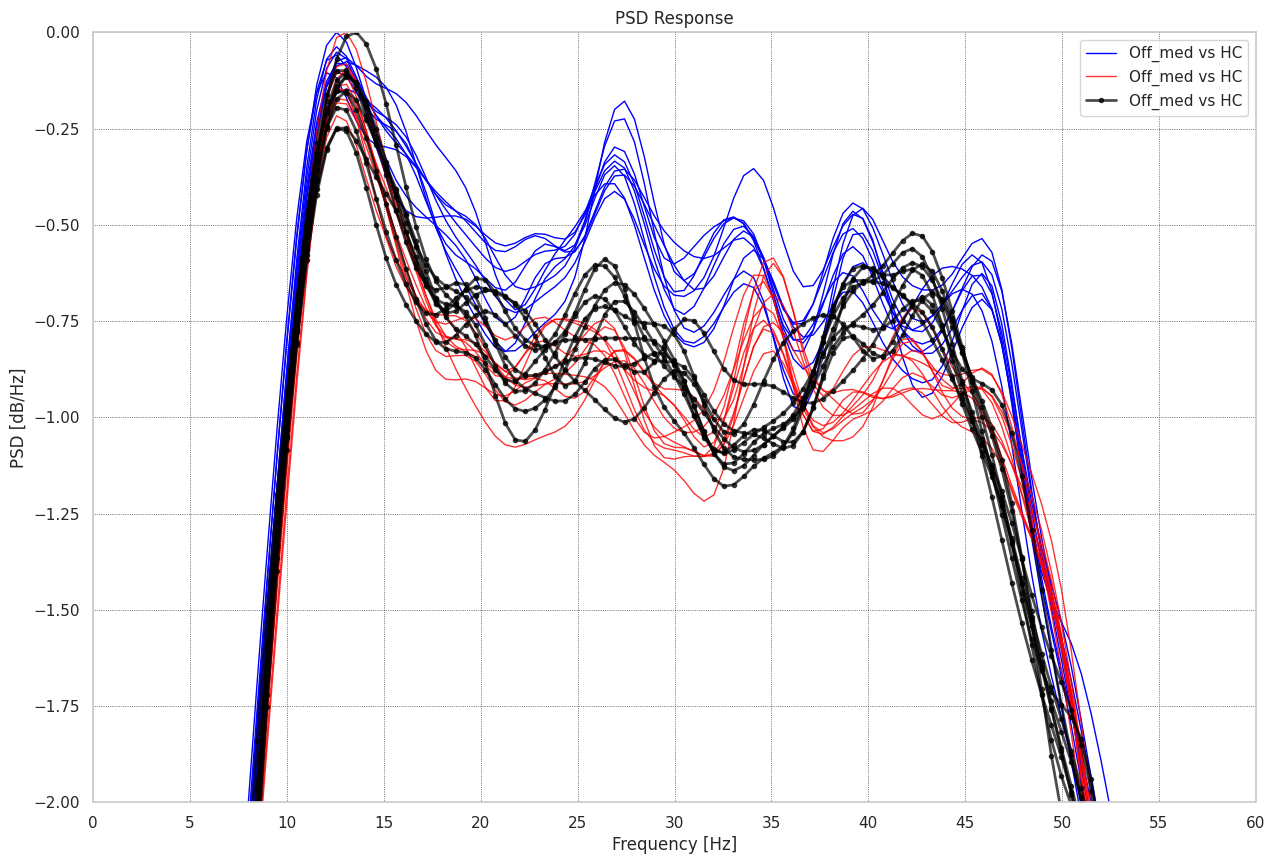

In [ ]:

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_Off_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_Off_vs_HC = globals()['PSD_%s'%f]
    else:
      PSD_Off_vs_HC = np.vstack((PSD_Off_vs_HC,globals()['PSD_%s'%f]))
# **************** reading On vs HC
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_HC/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_HC = globals()['PSD_%s'%f]
    else:
      PSD_On_vs_HC = np.vstack((PSD_On_vs_HC,globals()['PSD_%s'%f]))
# **************** reading On vs Off
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_Off/On_vs_Off/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_Off = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_Off = globals()['PSD_%s'%f]
    else:
      PSD_On_vs_Off = np.vstack((PSD_On_vs_Off,globals()['PSD_%s'%f]))


PSD_Off_vs_HC_db = 10*np.log10(np.abs(PSD_Off_vs_HC)/np.max(np.abs(PSD_Off_vs_HC)))
PSD_On_vs_HC_db = 10*np.log10(np.abs(PSD_On_vs_HC)/np.max(np.abs(PSD_On_vs_HC)))
PSD_On_vs_Off_db = 10*np.log10(np.abs(PSD_On_vs_Off)/np.max(np.abs(PSD_On_vs_Off)))


plt.figure(1,figsize=(15,10))
plt.plot(z,PSD_Off_vs_HC_db[0],linewidth=1,color='blue',label = 'Off_med vs HC')
plt.plot(z,PSD_Off_vs_HC_db[1],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[2],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[3],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[4],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[5],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[6],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[7],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[8],linewidth=1,color='blue')
plt.plot(z,PSD_Off_vs_HC_db[9],linewidth=1,color='blue')

plt.plot(z,PSD_On_vs_HC_db[0],linewidth=1,alpha=0.8,color='red',label = 'Off_med vs HC')
plt.plot(z,PSD_On_vs_HC_db[1],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[2],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[3],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[4],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[5],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[6],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[7],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[8],linewidth=1,alpha=0.8,color='red')
plt.plot(z,PSD_On_vs_HC_db[9],linewidth=1,alpha=0.8,color='red')

plt.plot(z,PSD_On_vs_Off_db[0],linewidth=2,color='black',alpha=0.7,marker='.',label = 'Off_med vs HC')
plt.plot(z,PSD_On_vs_Off_db[1],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[2],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[3],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[4],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[5],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[6],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[7],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[8],linewidth=2,color='black',alpha=0.7,marker='.')
plt.plot(z,PSD_On_vs_Off_db[9],linewidth=2,color='black',alpha=0.7,marker='.')






plt.xticks(np.arange(0, max(y)+1, 5))
plt.grid(linestyle=':', linewidth=0.5, color='k')

plt.xlim([0,60])
#linspace(0,250,1000),10*log10(abs(data_sad(i,:))./max(abs(data_sad(i,:)))),'r','LineWidth',2);
plt.ylim([-2,0])
plt.title('PSD Response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.legend()

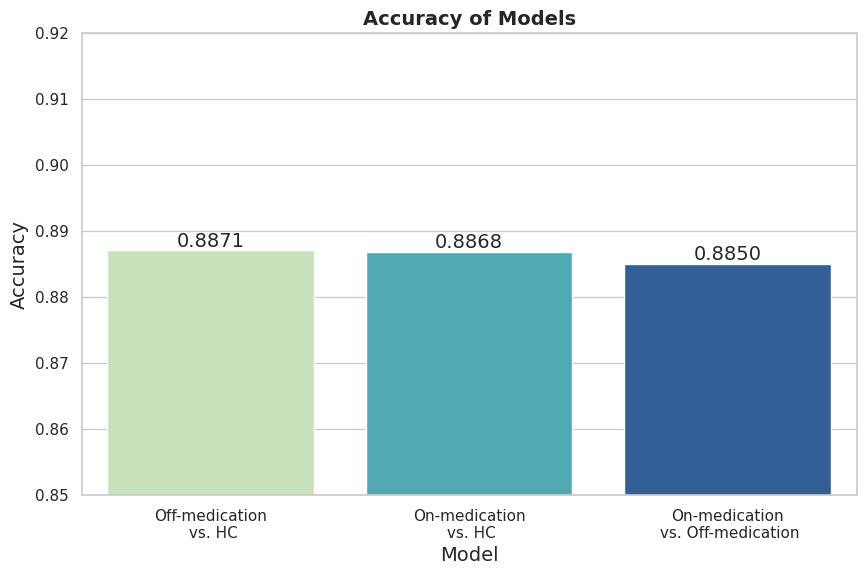

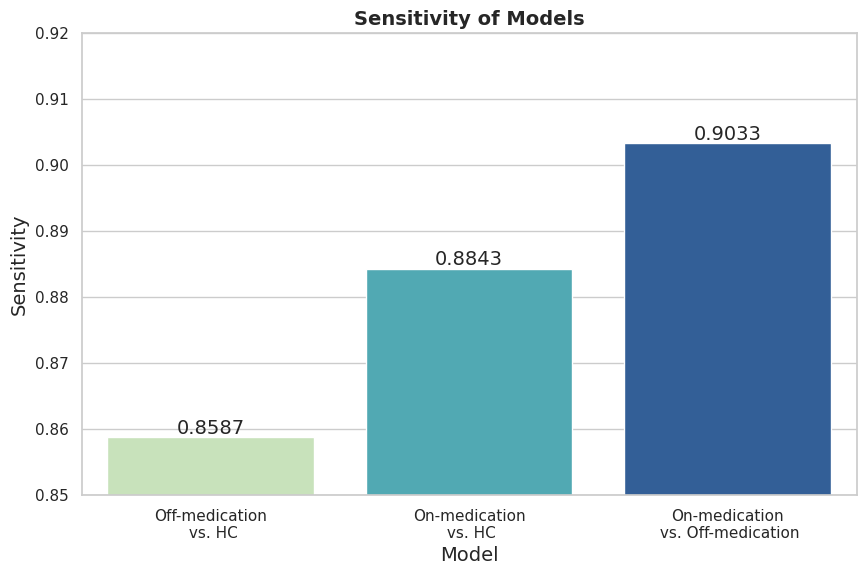

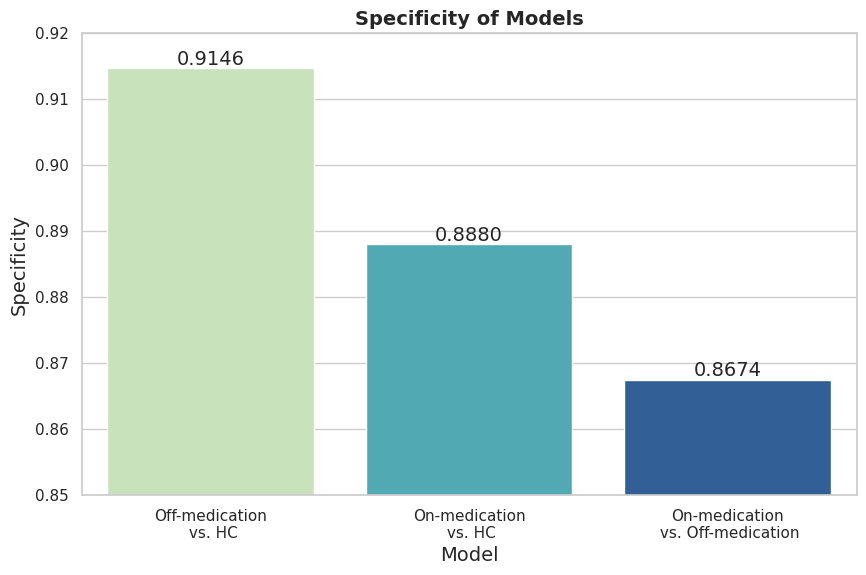

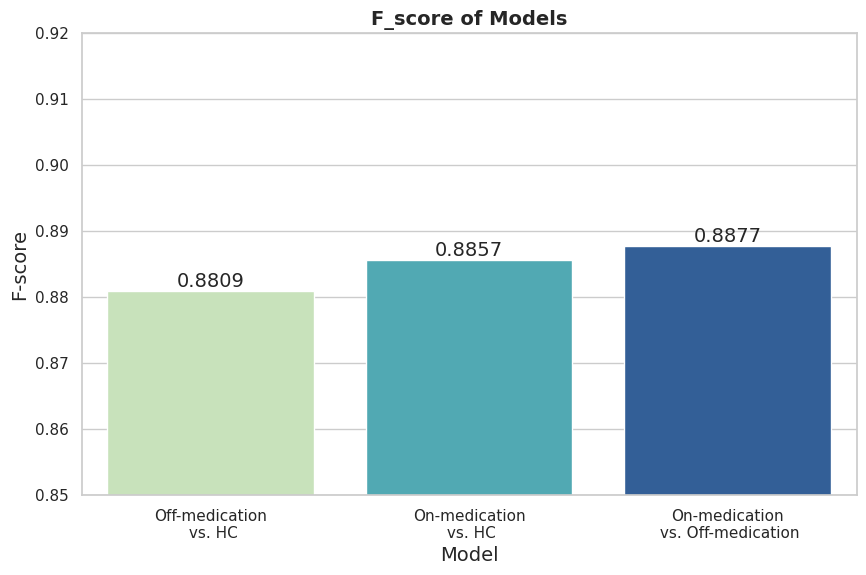

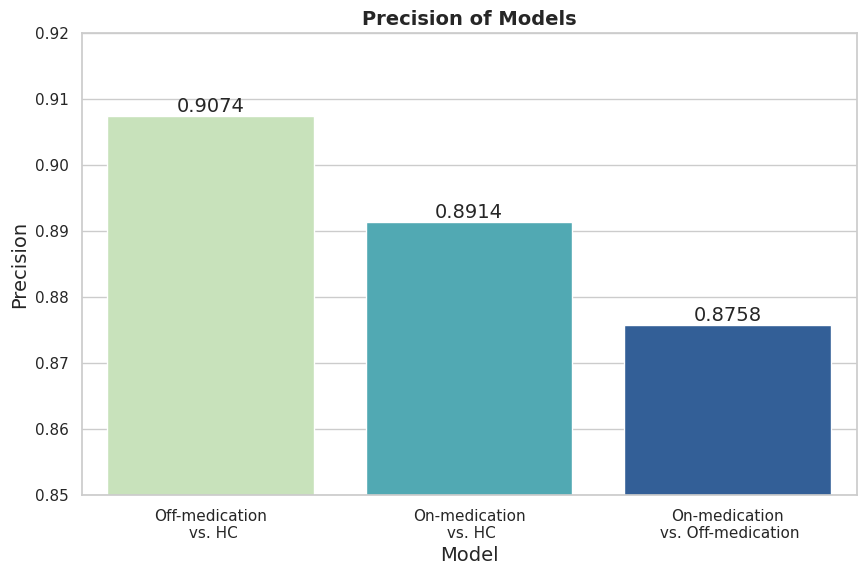

In [ ]:
import pandas as pd

data = pd.DataFrame({
    'Model': ['Off-medication\n vs. HC', 'On-medication\n vs. HC', 'On-medication\n vs. Off-medication'],
    'Accuracy': [0.887063, 0.886803, 0.884984],
    'Sensitivity': [0.858737, 0.884282, 0.903252],
    'Specificity': [0.914636, 0.887963, 0.867407],
    'F-score': [0.880905, 0.885651, 0.887725],
    'Precision': [0.907445, 0.891391, 0.875796]
})
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for Accuracy
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Accuracy", data=data, palette="YlGnBu")
plt.ylim(0.85, 0.92)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy of Models', fontsize=14,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=14)
plt.show()
# -----
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Sensitivity", data=data, palette="YlGnBu")
plt.ylim(0.85, 0.92)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Sensitivity', fontsize=14)
plt.title('Sensitivity of Models', fontsize=14,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=14)
plt.show()
# ----
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Specificity", data=data, palette="YlGnBu")
plt.ylim(0.85, 0.92)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Specificity', fontsize=14)
plt.title('Specificity of Models', fontsize=14,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=14)
plt.show()
# ----
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="F-score", data=data, palette="YlGnBu")
plt.ylim(0.85, 0.92)
plt.xlabel('Model', fontsize=14)
plt.ylabel('F-score', fontsize=14)
plt.title('F_score of Models', fontsize=14,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=14)
plt.show()
# ------
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Model", y="Precision", data=data, palette="YlGnBu")
plt.ylim(0.85, 0.92)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision of Models', fontsize=14,fontweight='bold')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=14)
plt.show()



In [ ]:
import numpy as np
from scipy import stats
# ---------------
onset = 0.5
end = 60
# **************** reading Off vs HC

for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_Off_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_Off_vs_HC = 10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))

    else:
      PSD_Off_vs_HC = np.vstack((PSD_Off_vs_HC,10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))))

# Generate some sample data for three different groups
fold1 = PSD_Off_vs_HC[0,500+int(onset*500/256):500+int(end*500/256)]
fold2 = PSD_Off_vs_HC[1,500+int(onset*500/256):500+int(end*500/256)]
fold3 = PSD_Off_vs_HC[2,500+int(onset*500/256):500+int(end*500/256)]
fold4 = PSD_Off_vs_HC[3,500+int(onset*500/256):500+int(end*500/256)]
fold5 = PSD_Off_vs_HC[4,500+int(onset*500/256):500+int(end*500/256)]
fold6 = PSD_Off_vs_HC[5,500+int(onset*500/256):500+int(end*500/256)]
fold7 = PSD_Off_vs_HC[6,500+int(onset*500/256):500+int(end*500/256)]
fold8 = PSD_Off_vs_HC[7,500+int(onset*500/256):500+int(end*500/256)]
fold9 = PSD_Off_vs_HC[8,500+int(onset*500/256):500+int(end*500/256)]
fold10 = PSD_Off_vs_HC[9,500+int(onset*500/256):500+int(end*500/256)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between groups.")


F-statistic: 0.02113654446020021
P-value: 0.9999995480145057
Fail to reject the null hypothesis. There is no significant difference between groups.


In [ ]:
import numpy as np
import scipy.io
arr = np.array(fold1)
scipy.io.savemat('Off_vs_HC_fold0.mat', {'matrix_name':arr})
arr = np.array(fold2)
scipy.io.savemat('Off_vs_HC_fold1.mat', {'matrix_name':arr})
arr = np.array(fold3)
scipy.io.savemat('Off_vs_HC_fold2.mat', {'matrix_name':arr})
arr = np.array(fold4)
scipy.io.savemat('Off_vs_HC_fold3.mat', {'matrix_name':arr})
arr = np.array(fold5)
scipy.io.savemat('Off_vs_HC_fold4.mat', {'matrix_name':arr})
arr = np.array(fold6)
scipy.io.savemat('Off_vs_HC_fold5.mat', {'matrix_name':arr})
arr = np.array(fold7)
scipy.io.savemat('Off_vs_HC_fold6.mat', {'matrix_name':arr})
arr = np.array(fold8)
scipy.io.savemat('Off_vs_HC_fold7.mat', {'matrix_name':arr})
arr = np.array(fold9)
scipy.io.savemat('Off_vs_HC_fold8.mat', {'matrix_name':arr})
arr = np.array(fold10)
scipy.io.savemat('Off_vs_HC_fold9.mat', {'matrix_name':arr})

In [ ]:
fold1

array([-2.12811523e+01, -2.04662715e+01, -1.83406708e+01, -1.56813287e+01,
       -1.31167319e+01, -1.08996578e+01, -9.07567811e+00, -7.61565966e+00,
       -6.46267916e+00, -5.54615917e+00, -4.79374570e+00, -4.14699240e+00,
       -3.57209677e+00, -3.05698255e+00, -2.59840162e+00, -2.19050687e+00,
       -1.82170504e+00, -1.47879587e+00, -1.15374365e+00, -8.48207362e-01,
       -5.72982553e-01, -3.43045634e-01, -1.71151348e-01, -6.23570245e-02,
       -1.07449292e-02, -4.82163733e-16, -9.45451651e-03, -2.38314907e-02,
       -4.02138922e-02, -6.64376410e-02, -1.12401549e-01, -1.81355663e-01,
       -2.66621183e-01, -3.54573210e-01, -4.31683078e-01, -4.91732212e-01,
       -5.38610472e-01, -5.82327372e-01, -6.30704014e-01, -6.82545499e-01,
       -7.27267055e-01, -7.51860037e-01, -7.50603589e-01, -7.29666735e-01,
       -7.02289847e-01, -6.78361105e-01, -6.56305525e-01, -6.22616676e-01,
       -5.59830632e-01, -4.59571201e-01, -3.32865172e-01, -2.09278966e-01,
       -1.24148837e-01, -

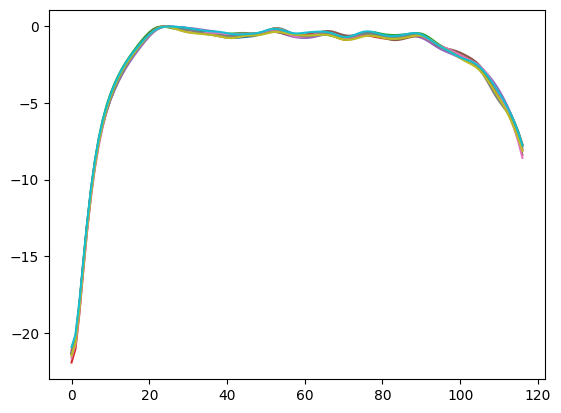

In [ ]:
plt.plot(fold1)
plt.plot(fold2)
plt.plot(fold3)
plt.plot(fold4)
plt.plot(fold5)
plt.plot(fold6)
plt.plot(fold7)
plt.plot(fold8)
plt.plot(fold9)
plt.plot(fold10)


In [ ]:

# **************** reading On vs HC
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_HC/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_HC = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_HC = 10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))

    else:
      PSD_On_vs_HC = np.vstack((PSD_On_vs_HC,10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))))

# Generate some sample data for three different groups
fold1 = PSD_On_vs_HC[0,500+int(onset*500/256):500+int(end*500/256)]
fold2 = PSD_On_vs_HC[1,500+int(onset*500/256):500+int(end*500/256)]
fold3 = PSD_On_vs_HC[2,500+int(onset*500/256):500+int(end*500/256)]
fold4 = PSD_On_vs_HC[3,500+int(onset*500/256):500+int(end*500/256)]
fold5 = PSD_On_vs_HC[4,500+int(onset*500/256):500+int(end*500/256)]
fold6 = PSD_On_vs_HC[5,500+int(onset*500/256):500+int(end*500/256)]
fold7 = PSD_On_vs_HC[6,500+int(onset*500/256):500+int(end*500/256)]
fold8 = PSD_On_vs_HC[7,500+int(onset*500/256):500+int(end*500/256)]
fold9 = PSD_On_vs_HC[8,500+int(onset*500/256):500+int(end*500/256)]
fold10 = PSD_On_vs_HC[9,500+int(onset*500/256):500+int(end*500/256)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between groups.")


F-statistic: 0.052616468774710046
P-value: 0.9999756193391571
Fail to reject the null hypothesis. There is no significant difference between groups.


In [ ]:
import numpy as np
import scipy.io
arr = np.array(fold1)
scipy.io.savemat('On_vs_HC_fold0.mat', {'matrix_name':arr})
arr = np.array(fold2)
scipy.io.savemat('On_vs_HC_fold1.mat', {'matrix_name':arr})
arr = np.array(fold3)
scipy.io.savemat('On_vs_HC_fold2.mat', {'matrix_name':arr})
arr = np.array(fold4)
scipy.io.savemat('On_vs_HC_fold3.mat', {'matrix_name':arr})
arr = np.array(fold5)
scipy.io.savemat('On_vs_HC_fold4.mat', {'matrix_name':arr})
arr = np.array(fold6)
scipy.io.savemat('On_vs_HC_fold5.mat', {'matrix_name':arr})
arr = np.array(fold7)
scipy.io.savemat('On_vs_HC_fold6.mat', {'matrix_name':arr})
arr = np.array(fold8)
scipy.io.savemat('On_vs_HC_fold7.mat', {'matrix_name':arr})
arr = np.array(fold9)
scipy.io.savemat('On_vs_HC_fold8.mat', {'matrix_name':arr})
arr = np.array(fold10)
scipy.io.savemat('On_vs_HC_fold9.mat', {'matrix_name':arr})

In [ ]:
# **************** reading On vs Off
for f in range(10):
  file_path = '/content/drive/My Drive/COLAB/project/Network_weights/On_vs_Off/On_vs_Off/'+'filters_vals_fold'+str(f)+'_'+str(epoch)+'.txt'
  globals()['Sinc_filts_%s'%f] = np.genfromtxt(file_path, delimiter = ',')
PSD = np.zeros([100,1000])
for f in range(10):
    for i in range(100):
      PSD[i][:] = np.fft.fftshift(np.multiply((1 / (512 * 500)),(np.abs(np.fft.fft(globals()['Sinc_filts_%s'%f][i, :], 1000)) ** 2)))
    globals()['PSD_%s'%f] = np.mean(PSD,axis=0)
    #cumulative_On_vs_Off = globals()['cumulative_%s'%f]/np.max(globals()['cumulative_%s'%f])
    if f==0:
      PSD_On_vs_Off = 10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))

    else:
      PSD_On_vs_Off = np.vstack((PSD_On_vs_Off,10*np.log10(np.abs(globals()['PSD_%s'%f])/np.max(np.abs(globals()['PSD_%s'%f])))))

# Generate some sample data for three different groups
fold1 = PSD_On_vs_Off[0,500+int(onset*500/256):500+int(end*500/256)]
fold2 = PSD_On_vs_Off[1,500+int(onset*500/256):500+int(end*500/256)]
fold3 = PSD_On_vs_Off[2,500+int(onset*500/256):500+int(end*500/256)]
fold4 = PSD_On_vs_Off[3,500+int(onset*500/256):500+int(end*500/256)]
fold5 = PSD_On_vs_Off[4,500+int(onset*500/256):500+int(end*500/256)]
fold6 = PSD_On_vs_Off[5,500+int(onset*500/256):500+int(end*500/256)]
fold7 = PSD_On_vs_Off[6,500+int(onset*500/256):500+int(end*500/256)]
fold8 = PSD_On_vs_Off[7,500+int(onset*500/256):500+int(end*500/256)]
fold9 = PSD_On_vs_Off[8,500+int(onset*500/256):500+int(end*500/256)]
fold10 = PSD_On_vs_Off[9,500+int(onset*500/256):500+int(end*500/256)]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10)

# Print the results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between groups.")


F-statistic: 0.032906030836006614
P-value: 0.9999968281328218
Fail to reject the null hypothesis. There is no significant difference between groups.


In [ ]:
import numpy as np
import scipy.io
arr = np.array(fold1)
scipy.io.savemat('On_vs_Off_fold0.mat', {'matrix_name':arr})
arr = np.array(fold2)
scipy.io.savemat('On_vs_Off_fold1.mat', {'matrix_name':arr})
arr = np.array(fold3)
scipy.io.savemat('On_vs_Off_fold2.mat', {'matrix_name':arr})
arr = np.array(fold4)
scipy.io.savemat('On_vs_Off_fold3.mat', {'matrix_name':arr})
arr = np.array(fold5)
scipy.io.savemat('On_vs_Off_fold4.mat', {'matrix_name':arr})
arr = np.array(fold6)
scipy.io.savemat('On_vs_Off_fold5.mat', {'matrix_name':arr})
arr = np.array(fold7)
scipy.io.savemat('On_vs_Off_fold6.mat', {'matrix_name':arr})
arr = np.array(fold8)
scipy.io.savemat('On_vs_Off_fold7.mat', {'matrix_name':arr})
arr = np.array(fold9)
scipy.io.savemat('On_vs_Off_fold8.mat', {'matrix_name':arr})
arr = np.array(fold10)
scipy.io.savemat('On_vs_Off_fold9.mat', {'matrix_name':arr})

# for ROC

## Import your dataset


In [ ]:
# خودشه
# دادگان با پیش پردازش جدید =))) Hoooray
def overlapping_win(signal,fs=512,window_length = 2,overlaping_shift = 0.5):
  # 75% overlapping windows
  i = 0
  while 1:
    if i==0:
      windowed_sig = signal[0,0:window_length*fs]
    else:
      windowed_sig = np.vstack((windowed_sig,signal[0,0+int(i*overlaping_shift*fs):int(window_length*fs+(i*overlaping_shift*fs))]))
    i = i+1
    if (window_length*fs+(i)*overlaping_shift*fs) >= signal.shape[1]:
      break
  return windowed_sig
# ************
import os.path as op
import os
!pip3 install mne
import mne
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
for hc_pd in [0,1]:
    address = []
    a = 0
    if hc_pd == 0:
        # it is healthy case
        for number in [1,2,4,7,8,10,18,20,21,24,25,29,30,31,32,33]:
            #********** 16 healthy
            a = a+1
            address = f'/content/drive/My Drive/COLAB/project/dataset/hc_{number}_final.set'
            file_name = f'hc_{a}'
            globals()['hc%s' % a] = mne.io.read_raw_eeglab(address)
            #globals()['hc%s_Oz' % a] = globals()['hc%s' % a].copy().pick(['Oz']).get_data()
            #globals()['hc%s_P8' % a] = globals()['hc%s' % a].copy().pick(['P8']).get_data()
            #globals()['hc%s_FC2' % a] = globals()['hc%s' % a].copy().pick(['FC2']).get_data()
            if a == 1:
              hc_Oz = globals()['hc%s' % a].copy().pick(['Oz']).get_data()
              hc_Oz = overlapping_win(hc_Oz)

            else:

              hc_Oz = np.vstack((hc_Oz, overlapping_win(globals()['hc%s' % a].copy().pick(['Oz']).get_data())))


    else:
        for number in [3,5,6,9,11,12,13,14,16,17,19,22,23,26,28]:
            #********** 15 PD
            a = a+1
            address = f'/content/drive/My Drive/COLAB/project/dataset/pd_{number}_off_final.set'
            file_name = f'pd_{a}'
            globals()['pd%s' % a] = mne.io.read_raw_eeglab(address)
            #globals()['pd%s_Oz' % a] = globals()['pd%s' % a].copy().pick(['Oz']).get_data()
            #globals()['pd%s_P8' % a] = globals()['pd%s' % a].copy().pick(['P8']).get_data()
            #globals()['pd%s_FC2' % a] = globals()['pd%s' % a].copy().pick(['FC2']).get_data()
            if a == 1:
              pd_Oz = globals()['pd%s' % a].copy().pick(['Oz']).get_data()
              pd_Oz = overlapping_win(pd_Oz)
            else:
              pd_Oz = np.vstack((pd_Oz, overlapping_win(globals()['pd%s' % a].copy().pick(['Oz']).get_data())))

clear_output()

print('pd_Oz is {} epochs with overlaping windows' .format(pd_Oz.shape))
print('hc_Oz is {} epochs with overlaping windows' .format(hc_Oz.shape))
# phase 2:
X_Oz = np.vstack([pd_Oz,hc_Oz])
X_Oz = np.squeeze(X_Oz)
Y = np.concatenate((np.ones(len(pd_Oz)),np.zeros(len(hc_Oz))))
# Min-MAx Scalling
scaler = MinMaxScaler()
model = scaler.fit(X_Oz)
X_Oz_MinMax = model.transform(X_Oz)
# چون ایندکس داده های ترین و تست قراره از فولدها دربیاد این بخش زیر هش شد
#train_data, test_data, train_labels, test_labels = train_test_split(X_Oz_MinMax, Y, test_size=0.1, random_state=1234, stratify=Y)
#print('For training we chose 90% of epochs that is {} epochs in general' .format(train_data.shape[0]))

pd_Oz is (4387, 1024) epochs with overlaping windows
hc_Oz is (4556, 1024) epochs with overlaping windows


## for model


In [ ]:
fold =




In [ ]:
test = DataLoader(list(zip(val_data,val_labels)), batch_size=val_data.shape[0], shuffle=False)
for X,Y in test:
  inp = X.double().float()
  lab = Y.double().float()
  inp = Ran_win(inp,wlen)
  pout=DNN2_net(DNN1_net(CNN_net(inp)))
  pred=torch.round(pout[:,0])
  loss = cost(pout[:,0], lab)# مقدار لاس در تست
  #print(loss)
  acc = torch.mean((pred==lab).float())